<a href="https://colab.research.google.com/github/Praneeth-18/ML-Lifecycle-and-Techniques/blob/main/Team_Pi_MidTerm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/midsem/Midterm-Dataset-Real-estate.csv')

# EDA

In [ ]:
df.head()

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,...,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,status_text,broker_name,input,property_url,listing_url
0,380,16957414,"3219 Polk Ave, San Diego, CA 92104",32.752050,-117.124700,799000,USD,1.0,2.0,810 sqft,...,10,NaN,False,https://photos.zillowstatic.com/fp/11176e2f997...,FOR SALE,House for sale,"Marianne Malek, Broker","https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/3219-Polk-A...,https://www.zillow.com/san-diego-ca/10_p/
1,12,19590788,"1801 Willow St, San Jose, CA 95125",37.301167,-121.918724,2350000,USD,3.0,4.0,1996 sqft,...,3,NaN,False,https://photos.zillowstatic.com/fp/f967921c9db...,FOR SALE,House for sale,NaN,"https://www.zillow.com/homes/San-Jose,-CA_rb/",https://www.zillow.com/homedetails/1801-Willow...,"https://www.zillow.com/homes/San-Jose,-CA_rb/"
2,97,16648030,"841 Kalpati Cir APT A, Carlsbad, CA 92008",33.148010,-117.334816,999900,USD,3.0,2.0,1750 sqft,...,3,NaN,False,https://photos.zillowstatic.com/fp/c3faafa19ba...,FOR SALE,Condo for sale,First Team Real Estate,"https://www.zillow.com/homes/Carlsbad,-CA_rb/",https://www.zillow.com/homedetails/841-Kalpati...,https://www.zillow.com/carlsbad-ca/3_p/
3,88,16950592,"3262 Loma Riviera Dr, San Diego, CA 92110",32.756230,-117.225204,795000,USD,2.0,2.0,1400 sqft,...,2,NaN,False,https://photos.zillowstatic.com/fp/892cd9b3188...,FOR SALE,Townhouse for sale,Coldwell Banker West,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/3262-Loma-R...,https://www.zillow.com/san-diego-ca/3_p/
4,778,16737931,"18614 Caminito Cantilena UNIT 334, San Diego, ...",33.046844,-117.071570,450000,USD,1.0,1.0,716 sqft,...,61,NaN,False,https://photos.zillowstatic.com/fp/6a4f846cf2c...,FOR SALE,Condo for sale,Realty One Group West,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/18614-Camin...,https://www.zillow.com/san-diego-ca/19_p/


In [ ]:
df.shape

(1755, 23)

In [ ]:
#looking for na values
df.isna().sum()

rank                  0
property_id           0
address               0
latitude              3
longitude             3
price                 0
currency              0
bathrooms            59
bedrooms             57
area                 55
land_area          1706
zestimate           334
rent_zestimate      111
days_on_zillow        0
sold_date          1755
is_zillow_owned       0
image                 0
listing_type          0
status_text           0
broker_name         505
input                 0
property_url          0
listing_url           0
dtype: int64

In [ ]:
#sold date is missing for the entire data set
df  = df.drop('sold_date',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             1755 non-null   int64  
 1   property_id      1755 non-null   int64  
 2   address          1755 non-null   object 
 3   latitude         1752 non-null   float64
 4   longitude        1752 non-null   float64
 5   price            1755 non-null   int64  
 6   currency         1755 non-null   object 
 7   bathrooms        1696 non-null   float64
 8   bedrooms         1698 non-null   float64
 9   area             1700 non-null   object 
 10  land_area        49 non-null     object 
 11  zestimate        1421 non-null   float64
 12  rent_zestimate   1644 non-null   float64
 13  days_on_zillow   1755 non-null   int64  
 14  is_zillow_owned  1755 non-null   bool   
 15  image            1755 non-null   object 
 16  listing_type     1755 non-null   object 
 17  status_text   

## Data Cleaning
List of steps we will be performing for preparing our data
1. Address is made up multiple part eg: 3262 Loma Riviera Dr, San Diego, CA 92110. From it we will exract all individual columns i.e. Street, City, state and ZIP
2. Check if all Prices are in USD -if they are we will drop the column, and if they are not we will convert verything to USD.
3. Converting Land Area and area to Integer (as of now it is being represented as vali sqft or acre). We will convert the acre values to sqft.

### Extracting Info from Address
Splitting the adress to extract first line of the adress the city, state and zip code.

In [ ]:
address_df = df['address'].str.strip().str.split(',', expand=True) # we apply strip wo prevent any white space in the beiginging or end of the string to cause any problems
# Rename the columns of the new DataFrame as needed
address_df.columns = ['first_line', 'city', 'state_zip']
address_df2 = address_df['state_zip'].str.strip().str.split(' ',expand=True)
address_df2.columns = ['state','zip']
address_df = pd.concat([address_df,address_df2],axis=1)
address_df.drop('state_zip',axis=1,inplace=True)
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_line  1755 non-null   object
 1   city        1755 non-null   object
 2   state       1692 non-null   object
 3   zip         1692 non-null   object
dtypes: object(4)
memory usage: 55.0+ KB


We have some missing values for state and Zip and zip is save as an object however needs to be saved as integer

In [ ]:
print('-'*80)
print('Value Distribution of State')
print(address_df['state'].value_counts())
print('-'*80)
print('Value distribution of ciy')
print(address_df['city'].value_counts())
print('-'*80)
print('Value distribution of zip')
print(address_df['zip'].value_counts())
print('-'*80)



--------------------------------------------------------------------------------
Value Distribution of State
state
CA    1692
Name: count, dtype: int64
--------------------------------------------------------------------------------
Value distribution of ciy
city
 San Diego                                           714
 San Jose                                            435
 Irvine                                              157
 Carlsbad                                            138
 La Jolla                                             85
 San Luis Obispo                                      77
 Laguna Niguel                                        59
 Del Mar                                              14
 Great Park Neighborhoods : Cascade at Solis Park     10
 Avenue at Central                                     8
 Lotus at UrbanOak                                     7
 Polaris at Solis Park                                 7
 Legacy Collection at San Luis Ranch                

<ipython-input-11-1a83dda2cd8b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='city', data=address_df, order=address_df['city'].value_counts().index, palette='pastel')


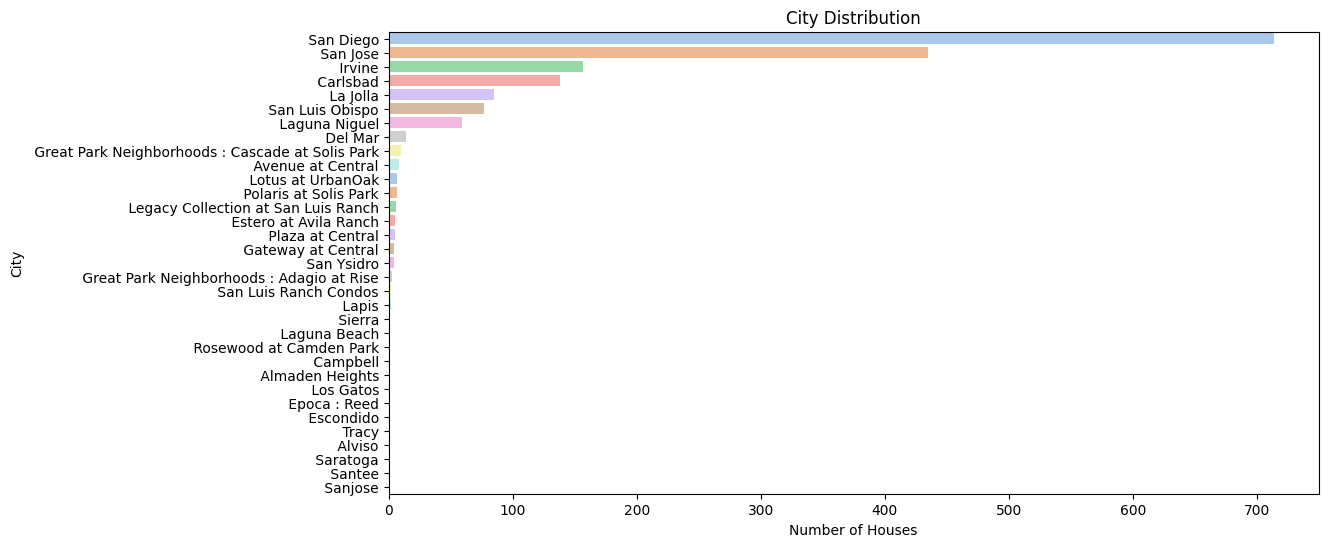

In [ ]:
# Visualization of city distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='city', data=address_df, order=address_df['city'].value_counts().index, palette='pastel')
plt.title('City Distribution')
plt.xlabel('Number of Houses')
plt.ylabel('City')
plt.show()

In [ ]:
address_df.isna().sum()

first_line     0
city           0
state         63
zip           63
dtype: int64

<Axes: >

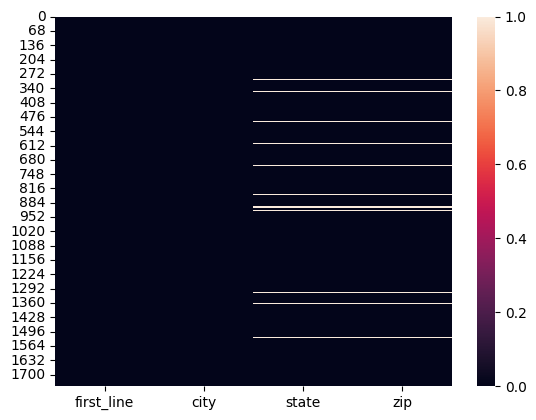

In [ ]:
sns.heatmap(address_df.isna())#visualizing  the missing values in the address_df

In [ ]:
address_df[address_df.isna().any(axis=1)] #looking at the missing data

,first_line,city,state,zip
11,Homes Available Soon,Almaden Heights,None,None
105,Plan 3 EXT Plan,Plaza at Central,None,None
146,The Welford Plan,Rosewood at Camden Park,None,None
149,Plan 6 Plan,Polaris at Solis Park,None,None
250,Plan 1 INT Plan,Plaza at Central,None,None
...,...,...,...,...
1524,Froom Plan,Legacy Collection at San Luis Ranch,None,None
1570,Plan 9 Plan,Polaris at Solis Park,None,None
1593,Plan 4 Plan,Estero at Avila Ranch,None,None
1630,Cascade 1E Plan,Great Park Neighborhoods : Cascade at Solis Park,None,None


We have the same number of missing state and zip values. Lets combine then with the entire dataset to see if the missing data has some common pattern with respect to the entire dataset

In [ ]:
combined_df = pd.concat([df,address_df],axis=1) # combining the extracted informatio

<Axes: >

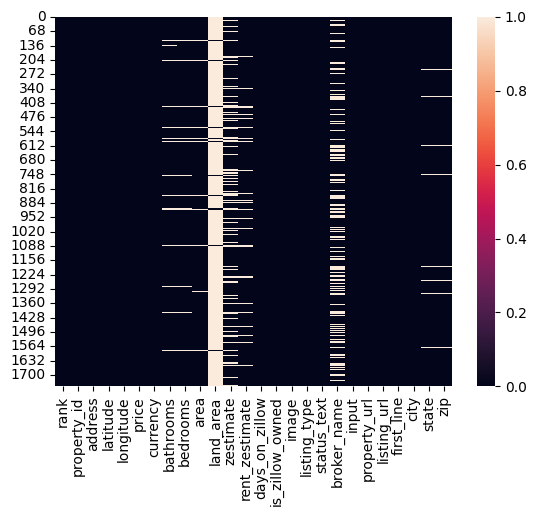

In [ ]:
sns.heatmap(combined_df.isna())# visualizing the pattern of missing values throughout the dataset

In [ ]:
#let us drop all rows where state and city are none
combined_df = combined_df.dropna(subset=['state','zip'],how='all')

In [ ]:
combined_df.shape

(1692, 26)

In [ ]:
print(f'We have dropperd {df.shape[0]-combined_df.shape[0]} rows')

We have dropperd 63 rows


In [ ]:
#the ZIP value is being saved as string however as the values are numeric in anture, we willsave them as integer
combined_df['zip']=combined_df['zip'].astype('int')


<ipython-input-20-4b27be121387>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['zip']=combined_df['zip'].astype('int')


### Makign Sure all currency are in dollars

In [ ]:
print(combined_df['currency'].isna().sum())
combined_df['currency'].value_counts()


0


currency
USD    1692
Name: count, dtype: int64

value of currency is same for all the records so we can go ahead and drop them

In [ ]:
combined_df.drop('currency',axis=1,inplace=True)

<ipython-input-22-ccc0d6903bf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df.drop('currency',axis=1,inplace=True)


### Land Area and Area

The area is supposed to be an integer value but in our dataset it is being represented as {value} sqft/acre. We wil be correcting that such that all the area and land area values will be interms of sqft.

Relation between area and land area, land area is used to represent the area of the plot of land and area is used to represent the area of the house. We found that for most part of our dataframe. When land area is present area will be missing and when area is present land area will be missing and very rowswill have both values missing.

In [ ]:
def get_rid_of_comma(s):
  return s.replace(',','')

def area_sqft(x):
  if pd.isna(x):
    return x
  else:
    return get_rid_of_comma(x[:-4])

combined_df['area_sqft'] = combined_df['area'].apply(area_sqft)

<ipython-input-23-44d244352ae8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['area_sqft'] = combined_df['area'].apply(area_sqft)


In [ ]:
combined_df['area_sqft'].isna().sum()

55

Out of 1692 records 55 missing so diff of 1637

#### Land Area part

In [ ]:
# Conversion function
def convert_to_sqft(value):
    if pd.isna(value):
        return value
    if 'acre' in value:
        number = float(value.split()[0])
        return f"{number * 43560} sqft"
    return value

combined_df['land_area_sqft'] = combined_df['land_area'].apply(convert_to_sqft)
combined_df['land_area_sqft'] = combined_df['land_area_sqft'].apply(area_sqft)

In [ ]:

combined_df['land_area_sqft'].isna().sum()

1643

In [ ]:
#finding number of rows where both land area and area_sqft is missing
combined_df[['land_area_sqft','area_sqft']].isna().all(axis=1).sum()

10

In [ ]:
#dropping records when both areas are missing
combined_df = combined_df.dropna(subset=['land_area_sqft','area_sqft'],how='all')

In [ ]:
#finding number of rows where both land area and area_sqft is missing
combined_df[['land_area_sqft','area_sqft']].isna().all(axis=1).sum()

0

<Axes: >

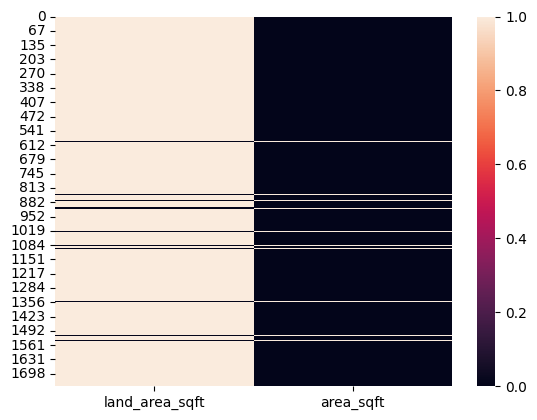

In [ ]:
sns.heatmap(combined_df[['land_area_sqft','area_sqft']].isna())

From the above heat map we can see that when land area is missing the area is present and when area is present the land area is missing. Cause of this we come to the conlusion that inour dataset a property can be either a house or a plot of land.

To confirm our hypothesis lets count the rows where both columns are not null

In [ ]:
combined_df.dropna(subset=['land_area_sqft', 'area_sqft']).shape[0]

4

Well our hypothesis is incorrect, as there are a few rows where both columns have some value. And as as land area has a high missing value ratio let us just drop it and the land_area_sqft column from it. And down the the line we plan on dropping all records where house type is Land / Lot

In [ ]:
#dropping the columns
combined_df.drop(['land_area_sqft', 'land_area','area'],axis=1,inplace=True)

In [ ]:
combined_df.isna().sum()

rank                 0
property_id          0
address              0
latitude             3
longitude            3
price                0
bathrooms           56
bedrooms            54
zestimate          326
rent_zestimate     109
days_on_zillow       0
is_zillow_owned      0
image                0
listing_type         0
status_text          0
broker_name        442
input                0
property_url         0
listing_url          0
first_line           0
city                 0
state                0
zip                  0
area_sqft           45
dtype: int64

In [ ]:
#combined_df.to_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/Zillow_housing_city_zip_extracted.csv',index=False)

#Dropping Single Valued Columns

In [ ]:
# Find columns with only one distinct value
single_value_columns = [col for col in combined_df.columns if combined_df[col].nunique() == 1]

In [ ]:
single_value_columns

['is_zillow_owned', 'listing_type', 'state']

We'll keep state for now, remaining onces we'll delete

In [ ]:
combined_df['is_zillow_owned'].value_counts()

is_zillow_owned
False    1682
Name: count, dtype: int64

In [ ]:
combined_df['listing_type'].value_counts()

listing_type
FOR SALE    1682
Name: count, dtype: int64

In [ ]:
combined_df.drop(['is_zillow_owned','listing_type'],axis=1,inplace = True)

###Removing Columns which we know we wont need for training or understanding the data distribution

In [ ]:
#dropping certain columns which we know are not going to be very useful for su such as poperty_url,
cols_to_drop = ['input','image','property_url','listing_url','days_on_zillow','broker_name']

In [ ]:
new_df  = combined_df.drop(cols_to_drop,axis=1)

In [ ]:
missing_counts = new_df.isna().sum()
columns_with_missing = missing_counts[missing_counts > 1]
print(columns_with_missing)

latitude            3
longitude           3
bathrooms          56
bedrooms           54
zestimate         326
rent_zestimate    109
area_sqft          45
dtype: int64


### Handling missing Values

#### Missing values for zestimate
what ever is the price, use that as the value

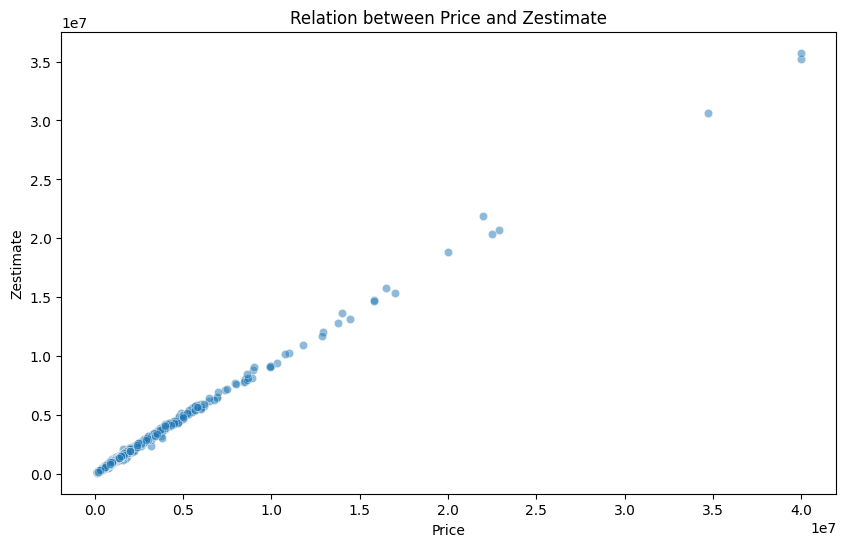

In [ ]:
temp = new_df.dropna(subset=['zestimate']) #dropping NA values for initial visualization
# Plotting the relation between price and zestimate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='zestimate', data=temp, alpha=0.5)
plt.title('Relation between Price and Zestimate')
plt.xlabel('Price')
plt.ylabel('Zestimate')
plt.show()


Ous assumption os using the price to fill in NA values is correct, as we are getting an almost y=x line.

In [ ]:
new_df['zestimate'] = new_df['zestimate'].fillna(new_df['price'])

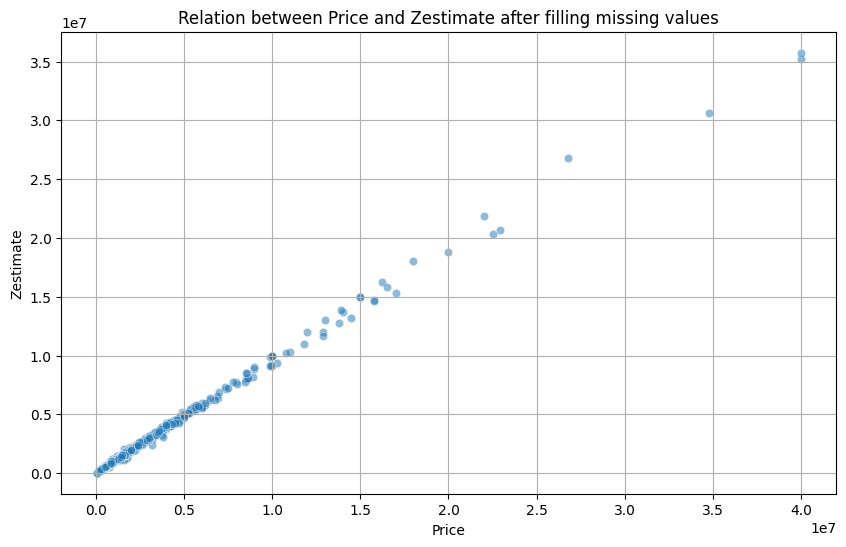

In [ ]:
# Plotting the relation between price and zestimate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='zestimate', data=new_df, alpha=0.5)
plt.title('Relation between Price and Zestimate after filling missing values')
plt.xlabel('Price')
plt.ylabel('Zestimate')
plt.grid(True)
plt.show()


#### Missing values for Area

We know the price for the house, we will use depend on its area and will also depend on the type of house it is.

We will use the status_text feature to extract different types of house, then we will new avergation based on type of houses and ZIP code to fill in this missing values

In [ ]:
new_df['status_text'].value_counts()

status_text
House for sale                823
Condo for sale                418
Home for sale                 111
Townhouse for sale            100
Multi-family home for sale     72
New construction               61
Lot / Land for sale            49
Coming soon                    42
Foreclosure                     3
Auction                         3
Name: count, dtype: int64

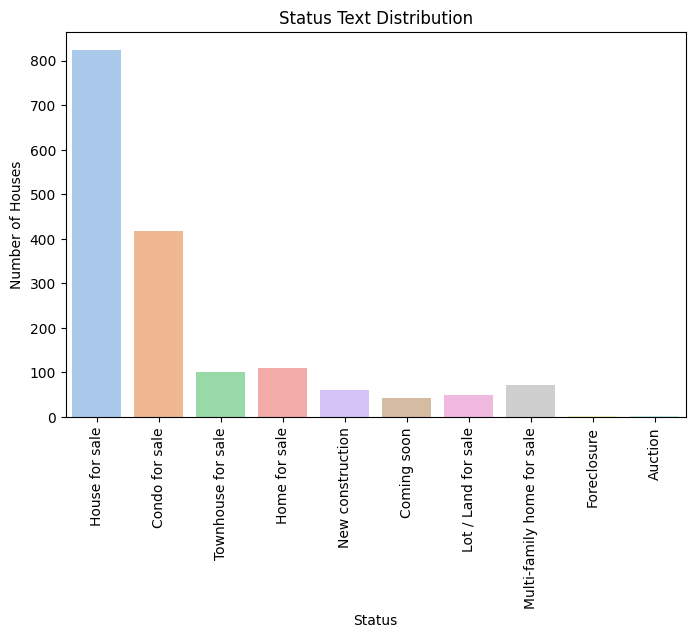

In [ ]:
# Plotting the distribution of house type
plt.figure(figsize=(8, 5))
sns.countplot(x='status_text', data=new_df, hue='status_text',palette='pastel',legend=False)
plt.title('Status Text Distribution')
plt.xlabel('Status')
plt.xticks(rotation=90)
plt.ylabel('Number of Houses')
plt.show()


In [ ]:
# we need to remove from sale in front of everythin other than Coming Soon, Foreclosure and Auction, those we'll replace by house as these  are selling method and not type of houses
def get_house_type(x):
  a=' for sale'
  if x in ('Coming soon','Foreclosure','Auction','New construction'):
    return 'House'
  else:
    return x[:-len(a)]

new_df['house_type'] = new_df['status_text'].apply(get_house_type)

new_df['house_type'].value_counts()


house_type
House                932
Condo                418
Home                 111
Townhouse            100
Multi-family home     72
Lot / Land            49
Name: count, dtype: int64

We know  that one of the house type in our dataframe is Lot / Land and we are not interested in it as we are only tring to find houses to invest on.

In [ ]:
new_df.shape

(1682, 17)

In [ ]:
#deleteing all the rows where house type s is lot/land
new_df = new_df[new_df['house_type'] != 'Lot / Land']

In [ ]:
new_df.shape

(1633, 17)

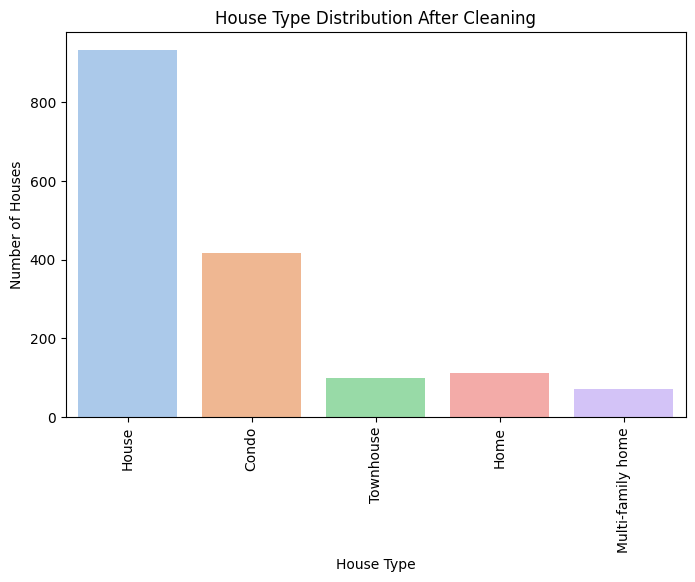

In [ ]:
# Plotting the distribution of house type
plt.figure(figsize=(8, 5))
sns.countplot(x='house_type', data=new_df, hue='house_type',palette='pastel',legend=False)
plt.title('House Type Distribution After Cleaning')
plt.xlabel('House Type')
plt.xticks(rotation=90)
plt.ylabel('Number of Houses')
plt.show()


In [ ]:
#converting area_sqft fron string to numeric while maintaining
new_df['area_sqft'] = pd.to_numeric(new_df['area_sqft'], errors='coerce')


In [ ]:
filler = new_df.groupby(['house_type']).agg({'area_sqft': 'mean'}).rename(columns={'area_sqft': 'area_sqft'})


In [ ]:
filler.columns

Index(['area_sqft'], dtype='object')

In [ ]:
for index,row in new_df[new_df['area_sqft'].isna()].iterrows():
    new_df.at[index,'area_sqft'] = filler['area_sqft'].loc[row.loc['house_type']]


In [ ]:
new_df['area_sqft'].isna().sum()

0

In [ ]:
missing_counts = new_df.isna().sum()
columns_with_missing = missing_counts[missing_counts > 1]
print(columns_with_missing)

latitude           3
longitude          3
bathrooms          7
bedrooms           5
rent_zestimate    90
dtype: int64


#### Handling Missing Bathroom values

we find the average value based on group by house type and zip, and use that to fill

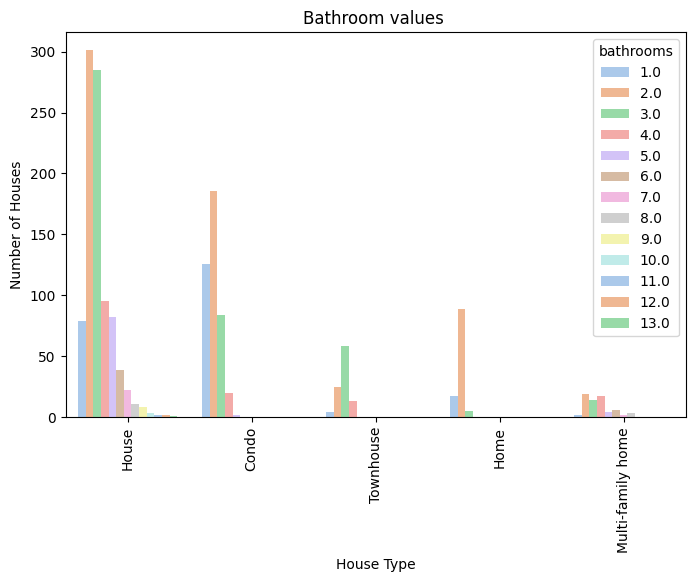

In [ ]:
# Plotting the distribution of house type
plt.figure(figsize=(8, 5))
sns.countplot(x='house_type', data=new_df, hue='bathrooms',palette='pastel',legend=True)
plt.title('Bathroom values ')
plt.xlabel('House Type')
plt.xticks(rotation=90)
plt.ylabel('Number of Houses')
plt.show()


In [ ]:
filler_house_zip = new_df.groupby(['house_type','zip']).agg({'bathrooms': 'mean'})
filler_house = new_df.groupby(['house_type']).agg({'bathrooms': 'mean'})

In [ ]:
for index,row in new_df[new_df['bathrooms'].isna()].iterrows():
    new_df.at[index,'bathrooms'] = filler_house_zip['bathrooms'][row.loc['house_type']][row.loc['zip']]

In [ ]:
missing_counts = new_df.isna().sum()
columns_with_missing = missing_counts[missing_counts >= 1]
print(columns_with_missing)

latitude           3
longitude          3
bathrooms          1
bedrooms           5
rent_zestimate    90
dtype: int64


In [ ]:
new_df = new_df.dropna(subset=['bathrooms']) # drop rows where bathrooms is na

#### Handling Missing values in Bedrooms

Using the same logic as we used for bathrooms

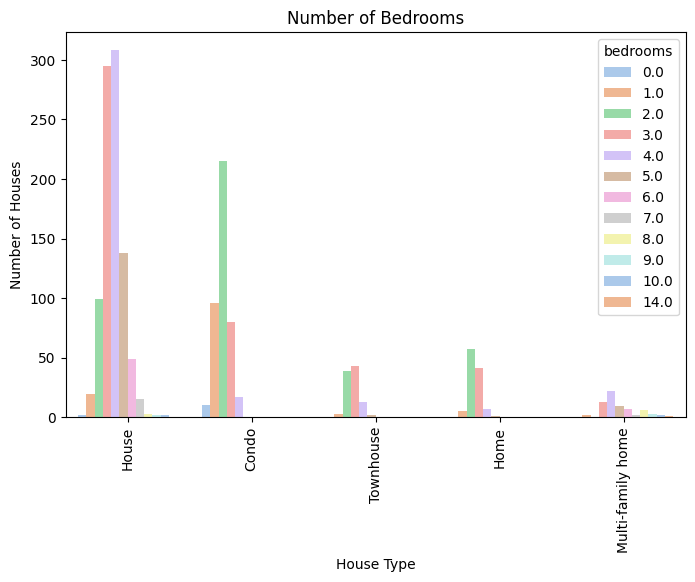

In [ ]:
# Plotting the distribution of house type
plt.figure(figsize=(8, 5))
sns.countplot(x='house_type', data=new_df, hue='bedrooms',palette='pastel',legend=True)
plt.title('Number of Bedrooms')
plt.xlabel('House Type')
plt.xticks(rotation=90)
plt.ylabel('Number of Houses')
plt.show()


In [ ]:
filler_house_zip = new_df.groupby(['house_type','zip']).agg({'bedrooms': 'mean'})
filler_house = new_df.groupby(['house_type']).agg({'bedrooms': 'mean'})
for index,row in new_df[new_df['bedrooms'].isna()].iterrows():
    new_df.at[index,'bedrooms'] = filler_house_zip['bedrooms'][row.loc['house_type']][row.loc['zip']]


In [ ]:
missing_counts = new_df.isna().sum()
columns_with_missing = missing_counts[missing_counts >= 1]
print(columns_with_missing)

latitude           3
longitude          3
rent_zestimate    90
dtype: int64


#### Handling Missing rent_zestimate values

As per https://www.nasdaq.com/articles/determining-how-much-you-should-charge-for-rent#:~:text=The%20amount%20of%20rent%20you,%242%2C000%20and%20%242%2C750%20each%20month. the rent is roughly 1.1% of the house's price we will use this logic for filling the missing values

In [ ]:
new_df['rent_zestimate'] = new_df['rent_zestimate'].fillna(new_df['price'] * 0.011)

####Handling Missing Latitude and Longitude value

Will be using the average value based on ZIP

In [ ]:
filler = new_df.groupby(['zip']).agg({'latitude': 'mean','longitude':'mean'})

In [ ]:
filler['latitude'][92008]

33.1542179

In [ ]:
for index,row in new_df[new_df['latitude'].isna()].iterrows():
    new_df.at[index,'latitude'] = filler['latitude'][row.loc['zip']]


In [ ]:
for index,row in new_df[new_df['longitude'].isna()].iterrows():
    new_df.at[index,'longitude'] = filler['longitude'][row.loc['zip']]


In [ ]:
missing_counts = new_df.isna().sum()
columns_with_missing = missing_counts[missing_counts >= 1]
print(columns_with_missing)

Series([], dtype: int64)


In [ ]:
#this means that there are 2 records

In [ ]:
new_df.shape

(1632, 17)

All missing values have been handled, and we have roughly dropped 150 rows in doing so

### Making sure the numeric columns are being saved as numeric

In [ ]:
c = ['rank','latitude','longitude','price','bathrooms','bedrooms','zestimate','rent_zestimate','zip','area_sqft']
for col in c:
  new_df[col] = pd.to_numeric(new_df[col], errors='coerce')


In [ ]:
new_df.isna().sum().sum()

0

## Adding HOA and Morgage Fees

Morgage Payment
As per https://www.moneygeek.com/mortgage/how-to-buy-a-house-in-california/ 20% of the house price should be downpayment. We take a tenure of 30years and a fixed rate of interest of 6.621% (reason for using this is these are the values zillowl uses for its calculations)


In [ ]:
def calculate_monthly_mortgage(houseprice):
    annual_interest_rate =6.621
    years = 6
    principal = houseprice*0.2
    monthly_interest_rate = annual_interest_rate / 12 / 100
    number_of_payments = years * 12
    monthly_payment = principal * monthly_interest_rate / (1 - (1 + monthly_interest_rate) ** -number_of_payments)
    return monthly_payment

new_df['morgage_fee'] = new_df['price'].apply(calculate_monthly_mortgage)



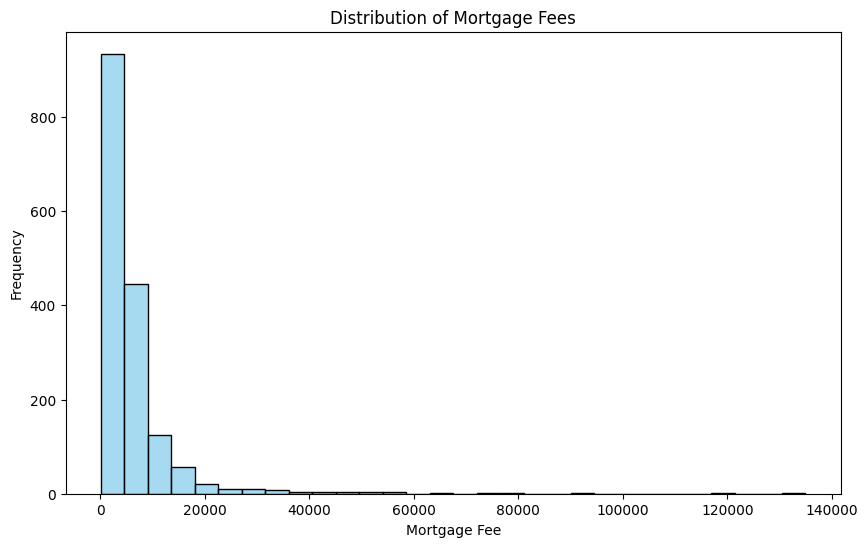

In [ ]:
# Plotting the distribution of mortgage fees
plt.figure(figsize=(10, 6))
sns.histplot(new_df['morgage_fee'], bins=30, color='skyblue')
plt.title('Distribution of Mortgage Fees')
plt.xlabel('Mortgage Fee')
plt.ylabel('Frequency')
plt.show()


### HOA
As per https://www.doorloop.com/blog/hoa-statistics 37% of the population lives under HOA and the average HOA value is $387 per month.

What we will be doing is based on the length of data frame randomly assign a random HOA (following normal distribution with mean around 387) to 37% of the data,the remaining will have a value of 0

In [ ]:
new_df.reset_index(drop=True,inplace=True) # resetting the index

In [ ]:
#code generated through chatgpt
import numpy as np

n = len(new_df)  # Size of the array
percent_normal = 0.37  # Percentage of values from normal distribution

# Number of values from normal distribution
num_normal = int(n * percent_normal)

# Generate values from normal distribution
normal_values = np.random.normal(loc=387, scale=10, size=num_normal)

# Create an array with the remaining values as 0
zero_values = np.zeros(n - num_normal)

# Combine the two arrays
combined_array = np.concatenate((normal_values, zero_values))

# Shuffle the combined array to mix the values
np.random.shuffle(combined_array)

print(combined_array)


[383.73682806 381.89620349 384.91418    ... 377.89465251   0.
   0.        ]


In [ ]:
new_df['hoa_fee'] = pd.Series(combined_array)

In [ ]:
new_df['hoa_fee']

0       383.736828
1       381.896203
2       384.914180
3         0.000000
4         0.000000
           ...    
1627    376.515083
1628    391.503823
1629    377.894653
1630      0.000000
1631      0.000000
Name: hoa_fee, Length: 1632, dtype: float64

In [ ]:
new_df.to_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/zillow_cleaned_data_with_noMissing_hoa_morgage.csv',index=False)

In [ ]:
new_df.head()

,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,status_text,first_line,city,state,zip,area_sqft,house_type,morgage_fee,hoa_fee
0,380,16957414,"3219 Polk Ave, San Diego, CA 92104",32.752050,-117.124700,799000,1.0,2.0,582900.0,3354.0,House for sale,3219 Polk Ave,San Diego,CA,92104,810,House,2695.442447,383.736828
1,12,19590788,"1801 Willow St, San Jose, CA 95125",37.301167,-121.918724,2350000,3.0,4.0,2489700.0,4995.0,House for sale,1801 Willow St,San Jose,CA,95125,1996,House,7927.771902,381.896203
2,97,16648030,"841 Kalpati Cir APT A, Carlsbad, CA 92008",33.148010,-117.334816,999900,3.0,2.0,1032800.0,3875.0,Condo for sale,841 Kalpati Cir APT A,Carlsbad,CA,92008,1750,Condo,3373.182606,384.914180
3,88,16950592,"3262 Loma Riviera Dr, San Diego, CA 92110",32.756230,-117.225204,795000,2.0,2.0,827200.0,3999.0,Townhouse for sale,3262 Loma Riviera Dr,San Diego,CA,92110,1400,Townhouse,2681.948367,0.000000
4,778,16737931,"18614 Caminito Cantilena UNIT 334, San Diego, ...",33.046844,-117.071570,450000,1.0,1.0,450000.0,2394.0,Condo for sale,18614 Caminito Cantilena UNIT 334,San Diego,CA,92128,716,Condo,1518.083981,0.000000


# Fractal Clustering

Objective we want to find clusters of property that maximize our objective of hoa_fee + morgage_fee < rent

Where hoa+morageg beceomes out monthly expense, teh rent becomes our monthly income.

So we want to maximize out monthly profit and minimize the our orignal investment i.e. price.

So we woud come up with an investment_ratio that would be monthly profit by investment, the higher this number will be the better that property is interms of investment. We want this ratio to be as high as possible, at the same time we also want to make sure that each clster has a good enough number of data points. We want the investment ratio to be greater than 0.7, in our golden cluster.

We will then use the golden clster know, and the remaining cluster to assign labels for classfication to our dataset.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/zillow_cleaned_data_with_noMissing_hoa_morgage.csv")

In [ ]:
df['return'] = df['rent_zestimate'] - (df['hoa_fee'] + df['morgage_fee'])
df['investment'] = df['price']

## Iteration 1

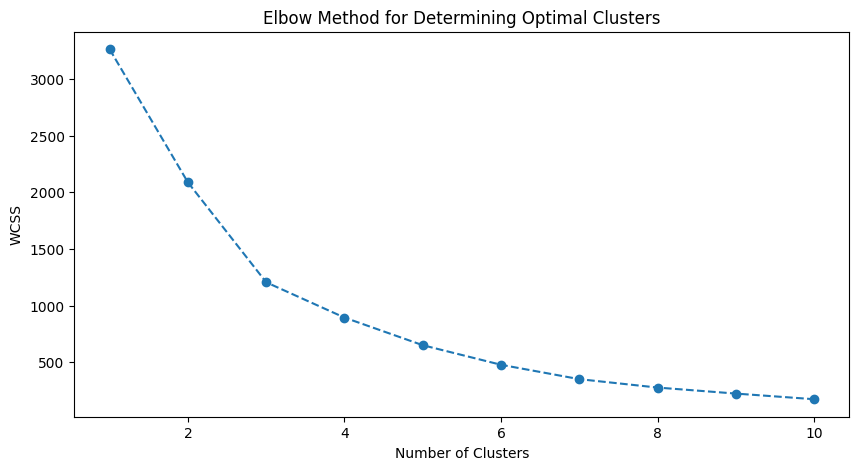

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

features = df[['return', 'investment']]
features_scaled = StandardScaler().fit_transform(features)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

elbow at 3

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting relevant features for clustering
features = df[['return', 'investment']]
features_scaled = StandardScaler().fit_transform(features)

# Apply KMeans clustering with an arbitrary choice of 3 clusters to start
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels to the original dataframe
df['cluster'] = clusters

# Calculate the average of the specified ratio for each cluster
# The ratio is: (Rent - (HOA fees + Mortgage Fees)) / Price
df['investment_ratio'] = df['return'] / df['price']
average_investment_ratio_per_cluster = df.groupby('cluster')['investment_ratio'].mean()

from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(features_scaled, clusters)

print(f'Silhouette Score: {silhouette_avg}')
average_investment_ratio_per_cluster.sort_values(ascending=False)

Silhouette Score: 0.8514948525049648


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
2    0.007615
0    0.000498
1   -0.000698
Name: investment_ratio, dtype: float64

Cluster 1 has the highest investment ratio.

In [ ]:
df['cluster'].value_counts()

cluster
0    1588
1      40
2       4
Name: count, dtype: int64

## Itertion 2

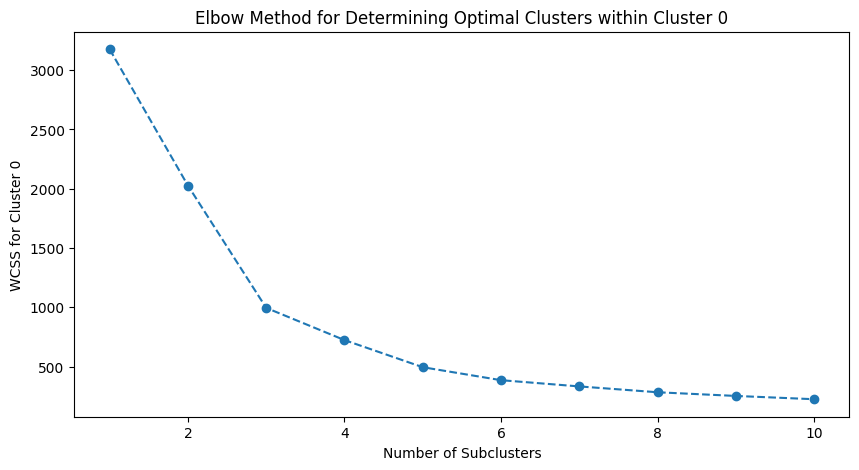

In [ ]:
# Since we are selecting within Cluster 0 based on the user's results
cluster_2_data = df[df['cluster'] == 0]

# Selecting the features for clustering
cluster_2_features = cluster_2_data[['return', 'investment']]
cluster_2_features_scaled = StandardScaler().fit_transform(cluster_2_features)

# Applying the Elbow Method to determine the optimal number of clusters within Cluster 2
wcss_cluster_2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(cluster_2_features_scaled)
    wcss_cluster_2.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_cluster_2, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal Clusters within Cluster 0')
plt.xlabel('Number of Subclusters')
plt.ylabel('WCSS for Cluster 0')
plt.show()

elbow at 3

In [ ]:
# Since the elbow seems to be at 3 clusters, we will use that for the further clustering
kmeans_cluster_2_final = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_2_subclusters = kmeans_cluster_2_final.fit_predict(cluster_2_features_scaled)

# Add subcluster labels to the Cluster 2 dataframe
cluster_2_data['subcluster'] = cluster_2_subclusters

# Calculate the average of the specified ratio for each subcluster
cluster_2_data['investment_ratio'] = cluster_2_data['return'] / cluster_2_data['investment']
average_investment_ratio_per_subcluster_2 = cluster_2_data.groupby('subcluster')['investment_ratio'].mean()

average_investment_ratio_per_subcluster_2.sort_values(ascending=False)

<ipython-input-91-938d8817fc4e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_data['subcluster'] = cluster_2_subclusters
<ipython-input-91-938d8817fc4e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_data['investment_ratio'] = cluster_2_data['return'] / cluster_2_data['investment']


subcluster
0    0.007573
2    0.000532
1   -0.000721
Name: investment_ratio, dtype: float64

In [ ]:
# Calculate silhouette score for subclusters within Cluster 0
silhouette_avg_cluster_0 = silhouette_score(cluster_2_features_scaled, cluster_2_subclusters)

print(f'Silhouette Score for subclusters within Cluster 0: {silhouette_avg_cluster_0}')

Silhouette Score for subclusters within Cluster 0: 0.6402480663810064


In [ ]:
cluster_2_data['subcluster'].value_counts()

subcluster
2    1286
1     263
0      39
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

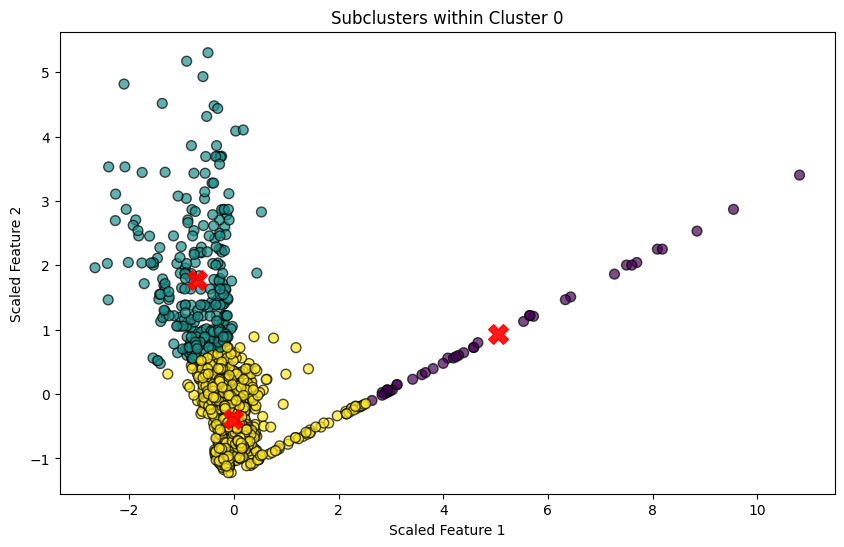

In [ ]:
import matplotlib.pyplot as plt

# Clear any existing plots
plt.clf()

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Plot the data points, colored by their subcluster assignment
plt.scatter(cluster_2_features_scaled[:, 0], cluster_2_features_scaled[:, 1], c=cluster_2_subclusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)

# Plot the subcluster centers
subcluster_centers = kmeans_cluster_2_final.cluster_centers_
plt.scatter(subcluster_centers[:, 0], subcluster_centers[:, 1], c='red', s=200, alpha=0.9, marker='X')

# Label the axes
plt.title('Subclusters within Cluster 0')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')

# Show the plot
plt.show()

We can see that the 3 cluster has some sort of distinct boundaries and seperation

## Iteration 3

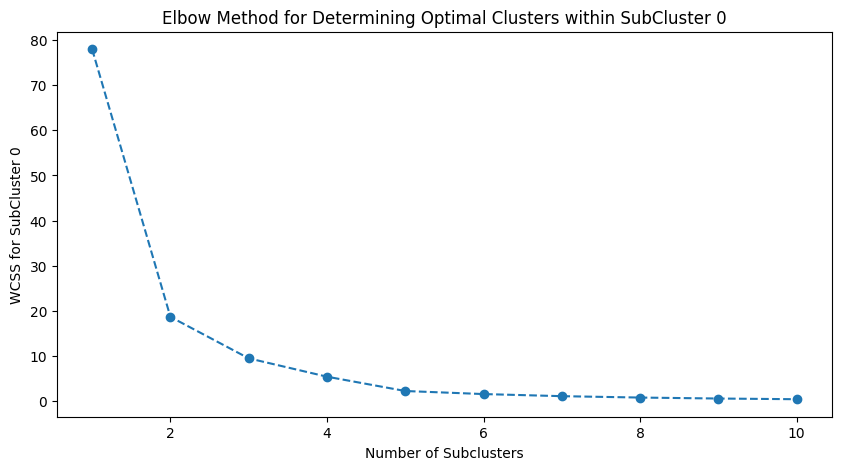

In [ ]:
# Since we are selecting within Cluster 2 based on the user's results
cluster_3_data = cluster_2_data[cluster_2_data['subcluster'] == 0]

# Selecting the features for clustering
cluster_3_features = cluster_3_data[['return', 'investment']]
cluster_3_features_scaled = StandardScaler().fit_transform(cluster_3_features)

# Applying the Elbow Method to determine the optimal number of clusters within Cluster 2
wcss_cluster_3 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(cluster_3_features_scaled)
    wcss_cluster_3.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_cluster_3, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal Clusters within SubCluster 0')
plt.xlabel('Number of Subclusters')
plt.ylabel('WCSS for SubCluster 0')
plt.show()

Elbow at 3

In [ ]:
# Since the elbow seems to be at 3 clusters based on the user's feedback, we will use that for the further clustering
# Performing KMeans clustering on Cluster 0 with 3 subclusters
kmeans_cluster_3_final = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_3_subclusters = kmeans_cluster_3_final.fit_predict(cluster_3_features_scaled)

# Add subcluster labels to the Cluster 2 dataframe
cluster_3_data['subcluster'] = cluster_3_subclusters

# Calculate the average of the specified ratio for each subcluster
cluster_3_data['investment_ratio'] = cluster_3_data['return'] / cluster_3_data['investment']
average_investment_ratio_per_subcluster_3 = cluster_3_data.groupby('subcluster')['investment_ratio'].mean()

average_investment_ratio_per_subcluster_3.sort_values(ascending=False)

<ipython-input-96-cdd5f14c9ecd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3_data['subcluster'] = cluster_3_subclusters
<ipython-input-96-cdd5f14c9ecd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3_data['investment_ratio'] = cluster_3_data['return'] / cluster_3_data['investment']


subcluster
2    0.007589
0    0.007585
1    0.007559
Name: investment_ratio, dtype: float64

In [ ]:
cluster_3_data['subcluster'].value_counts()

subcluster
1    20
0    10
2     9
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

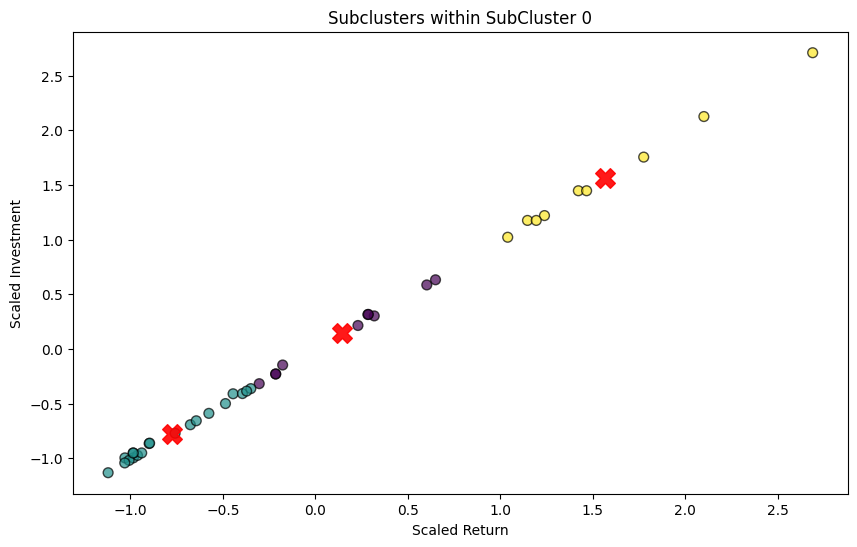

In [ ]:
# Clear any previous plots
plt.clf()

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Plot the data points, colored by their subcluster assignment
plt.scatter(cluster_3_features_scaled[:, 0], cluster_3_features_scaled[:, 1], c=cluster_3_subclusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)

# Plot the subcluster centers
subcluster_centers = kmeans_cluster_3_final.cluster_centers_
plt.scatter(subcluster_centers[:, 0], subcluster_centers[:, 1], c='red', s=200, alpha=0.9, marker='X')

# Label the axes
plt.title('Subclusters within SubCluster 0')
plt.xlabel('Scaled Return')
plt.ylabel('Scaled Investment')

# Show the plot
plt.show()

# Using the Insigts we Gained In clustering for laeblling the data for classification

## For Most Desirable

In [ ]:
most_desirable_1 = df[df['cluster'] == 1]
most_desirable_1 = most_desirable_1.drop(['return',	'investment',	'cluster', 'investment_ratio'], axis = 1)
most_desirable_2 = cluster_2_data[cluster_2_data['subcluster'] == 2]
most_desirable_2 = most_desirable_2.drop(['return',	'investment',	'cluster',	'investment_ratio',	'subcluster'], axis = 1)
most_desirable_3 = cluster_3_data[cluster_3_data['subcluster'] == 2]
most_desirable_3 = most_desirable_3.drop(['return', 'investment',	'cluster', 'investment_ratio',	'subcluster'], axis = 1)
most_desirable = pd.concat([most_desirable_1, most_desirable_2, most_desirable_3], ignore_index=True)
most_desirable['label'] = ['Most Desirable']*most_desirable.shape[0]

## For Least Desirable

In [ ]:
least_desirable_1 = df[df['cluster'] == 2]
least_desirable_1 = least_desirable_1.drop(['return', 'investment',	'cluster', 'investment_ratio'], axis = 1)
least_desirable_2 = cluster_2_data[cluster_2_data['subcluster'] == 1]
least_desirable_2 = least_desirable_2.drop(['return', 'investment',	'cluster',	'investment_ratio',	'subcluster'], axis = 1)
least_desirable_3 = cluster_3_data[cluster_3_data['subcluster'] == 0]
least_desirable_3 = least_desirable_3.drop(['return', 'investment',	'cluster', 'investment_ratio',	'subcluster'], axis = 1)
least_desirable = pd.concat([least_desirable_1, least_desirable_2, least_desirable_3], ignore_index=True)
least_desirable.shape
least_desirable['label'] = ['Least Desirable']*least_desirable.shape[0]
least_desirable.head()


,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,status_text,first_line,city,state,zip,area_sqft,house_type,morgage_fee,hoa_fee,label
0,50,16849330,"308 Vista De La Playa, La Jolla, CA 92037",32.834736,-117.280975,26800000,9.0,7.0,26800000.0,294800.0,House for sale,308 Vista De La Playa,La Jolla,CA,92037,10300,House,90410.334884,389.731349,Least Desirable
1,368,16851853,"6357 Castejon Dr, La Jolla, CA 92037",32.831413,-117.249140,14995000,9.0,5.0,14995000.0,164945.0,House for sale,6357 Castejon Dr,La Jolla,CA,92037,8011,House,50585.931775,0.000000,Least Desirable
2,423,65398691,"2500 6th Ave PENTHOUSE 4, San Diego, CA 92103",32.732086,-117.159870,13885000,5.0,4.0,13885000.0,152735.0,House for sale,2500 6th Ave PENTHOUSE 4,San Diego,CA,92103,5000,House,46841.324622,0.000000,Least Desirable
3,441,99519992,"(undisclosed Address), San Diego, CA 92127",33.014316,-117.130280,12999000,8.0,6.0,12999000.0,142989.0,House for sale,(undisclosed Address),San Diego,CA,92127,8417,House,43852.385939,385.709336,Least Desirable
4,12,19590788,"1801 Willow St, San Jose, CA 95125",37.301167,-121.918724,2350000,3.0,4.0,2489700.0,4995.0,House for sale,1801 Willow St,San Jose,CA,95125,1996,House,7927.771902,381.896203,Least Desirable


## More Desireable

In [ ]:
more_desirable = cluster_3_data[cluster_3_data['subcluster'] == 1]
more_desirable = more_desirable.drop(['return', 'investment',	'cluster', 'investment_ratio',	'subcluster'], axis = 1)
more_desirable.shape
more_desirable['label'] = ['More Desirable']*more_desirable.shape[0]

## Final Labelled Dataset



In [ ]:
labeled_dataset = pd.concat([least_desirable, more_desirable, most_desirable], ignore_index=True)
labeled_dataset['label'].value_counts()

label
Most Desirable     1335
Least Desirable     277
More Desirable       20
Name: count, dtype: int64

In [ ]:
#labeled_dataset.to_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/midsem/labeled_cleaned_zillow_dataset.csv', index=False)

#**Fractal Clustering with Fractal Distance**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/zillow_cleaned_data_with_noMissing_hoa_morgage.csv")

In [ ]:
df.head()

,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,status_text,first_line,city,state,zip,area_sqft,house_type,morgage_fee,hoa_fee
0,380,16957414,"3219 Polk Ave, San Diego, CA 92104",32.752050,-117.124700,799000,1.0,2.0,582900.0,3354.0,House for sale,3219 Polk Ave,San Diego,CA,92104,810,House,2695.442447,383.736828
1,12,19590788,"1801 Willow St, San Jose, CA 95125",37.301167,-121.918724,2350000,3.0,4.0,2489700.0,4995.0,House for sale,1801 Willow St,San Jose,CA,95125,1996,House,7927.771902,381.896203
2,97,16648030,"841 Kalpati Cir APT A, Carlsbad, CA 92008",33.148010,-117.334816,999900,3.0,2.0,1032800.0,3875.0,Condo for sale,841 Kalpati Cir APT A,Carlsbad,CA,92008,1750,Condo,3373.182606,384.914180
3,88,16950592,"3262 Loma Riviera Dr, San Diego, CA 92110",32.756230,-117.225204,795000,2.0,2.0,827200.0,3999.0,Townhouse for sale,3262 Loma Riviera Dr,San Diego,CA,92110,1400,Townhouse,2681.948367,0.000000
4,778,16737931,"18614 Caminito Cantilena UNIT 334, San Diego, ...",33.046844,-117.071570,450000,1.0,1.0,450000.0,2394.0,Condo for sale,18614 Caminito Cantilena UNIT 334,San Diego,CA,92128,716,Condo,1518.083981,0.000000


### **Defining the 2 objective Functions:**

Maximize return : Rent - HOA - Morgage

Minimize investment: Price

### **Ratio for evaluation:**

return / investment

In [ ]:
df['return'] = df['rent_zestimate'] - (df['hoa_fee'] + df['morgage_fee'])
df['investment'] = df['price']

def calculate_investment_efficiency(row):
    return (row['rent_zestimate'] - row['hoa_fee'] - row['morgage_fee'])*100 / row['price']

# Apply the investment efficiency function to each row in the dataframe
df['investment_efficiency'] = df.apply(calculate_investment_efficiency, axis=1)

# Define a 'fractal' distance function
def fractal_distance(row1, row2):
    # Using absolute difference between the scaled efficiencies as a 'distance'
    return abs(row1['investment_efficiency'] - row2['investment_efficiency'])

# Example usage:
# Calculate the 'fractal' distance between the first and second property
distance = fractal_distance(df.iloc[0], df.iloc[1])
print(f"The 'fractal' distance between the two properties is: {distance}")

The 'fractal' distance between the two properties is: 0.17544529175583487


In [ ]:
df.head()

,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,...,city,state,zip,area_sqft,house_type,morgage_fee,hoa_fee,return,investment,investment_efficiency
0,380,16957414,"3219 Polk Ave, San Diego, CA 92104",32.752050,-117.124700,799000,1.0,2.0,582900.0,3354.0,...,San Diego,CA,92104,810,House,2695.442447,383.736828,274.820725,799000,0.034396
1,12,19590788,"1801 Willow St, San Jose, CA 95125",37.301167,-121.918724,2350000,3.0,4.0,2489700.0,4995.0,...,San Jose,CA,95125,1996,House,7927.771902,381.896203,-3314.668106,2350000,-0.141050
2,97,16648030,"841 Kalpati Cir APT A, Carlsbad, CA 92008",33.148010,-117.334816,999900,3.0,2.0,1032800.0,3875.0,...,Carlsbad,CA,92008,1750,Condo,3373.182606,384.914180,116.903214,999900,0.011691
3,88,16950592,"3262 Loma Riviera Dr, San Diego, CA 92110",32.756230,-117.225204,795000,2.0,2.0,827200.0,3999.0,...,San Diego,CA,92110,1400,Townhouse,2681.948367,0.000000,1317.051633,795000,0.165667
4,778,16737931,"18614 Caminito Cantilena UNIT 334, San Diego, ...",33.046844,-117.071570,450000,1.0,1.0,450000.0,2394.0,...,San Diego,CA,92128,716,Condo,1518.083981,0.000000,875.916019,450000,0.194648


## Iteration 1

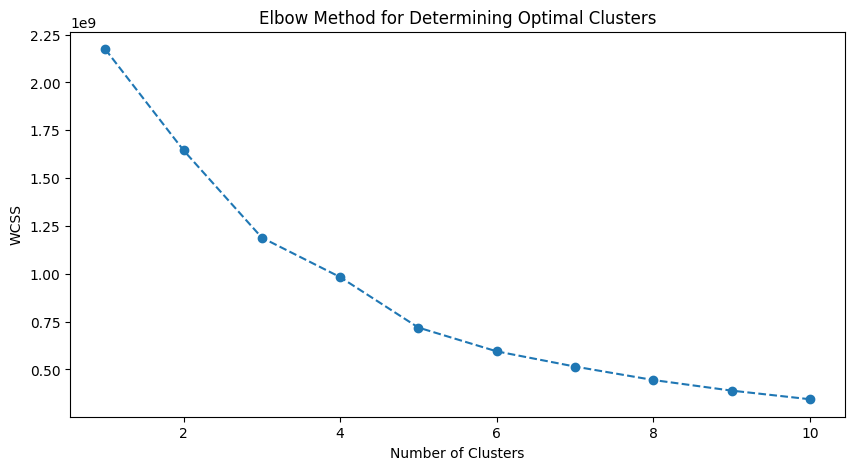

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# In this case, it will just return the absolute difference between efficiencies
def fractal_distance(X1, X2):
    return np.abs(X1 - X2)

# Normalize the investment efficiency
scaler = StandardScaler()
df['scaled_efficiency'] = scaler.fit_transform(df[['investment_efficiency']].values.reshape(-1, 1))

# Define your feature set for K-Means, which now includes 'scaled_efficiency'
features = df[['latitude', 'longitude', 'price','rent_zestimate', 'area_sqft', 'scaled_efficiency']].values

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=i, init='random', algorithm='full', n_init=10, random_state=42)
    kmeans.fit(features)

    # Compute distances for each point to its cluster center
    centers = np.array([kmeans.cluster_centers_[label] for label in kmeans.labels_])
    distances = fractal_distance(features, centers)

    # Sum distances to compute WCSS
    wcss_value = np.sum(distances)
    wcss.append(wcss_value)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Perform K-means clustering with k = 3
k = 3
kmeans1 = KMeans(n_clusters=k, init='random', algorithm='full', n_init=10, random_state=42)
kmeans1.fit(features)

# Assign the labels to the dataframe
df['cluster'] = kmeans1.labels_

# Calculate the average investment efficiency for each cluster
cluster_avg_efficiency = df.groupby('cluster')['investment_efficiency'].mean()

print(cluster_avg_efficiency)

cluster
0    0.056592
1   -0.018918
2    0.110079
Name: investment_efficiency, dtype: float64


In [ ]:
df['cluster'].value_counts()

cluster
0    1423
1     188
2      21
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_iteration_1 = silhouette_score(features, df['cluster'])

print(f'Silhouette Score: {silhouette_iteration_1}')

Silhouette Score: 0.7425823873056272


<Figure size 640x480 with 0 Axes>

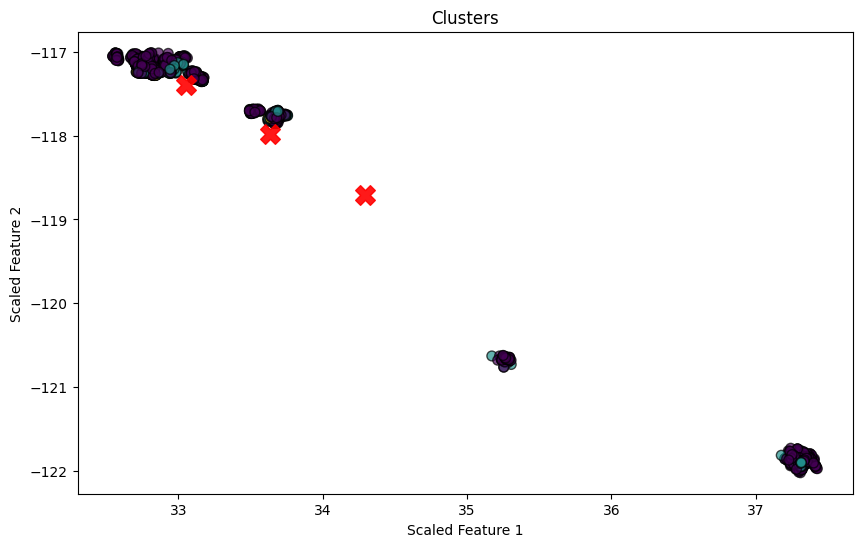

In [ ]:
import matplotlib.pyplot as plt

# Clear any existing plots
plt.clf()

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Plot the data points, colored by their subcluster assignment
plt.scatter(features[:, 0], features[:, 1], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)

# Plot the subcluster centers
subcluster_centers = kmeans1.cluster_centers_
plt.scatter(subcluster_centers[:, 0], subcluster_centers[:, 1], c='red', s=200, alpha=0.9, marker='X')

# Label the axes
plt.title('Clusters')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')

# Show the plot
plt.show()

## Iteration 2

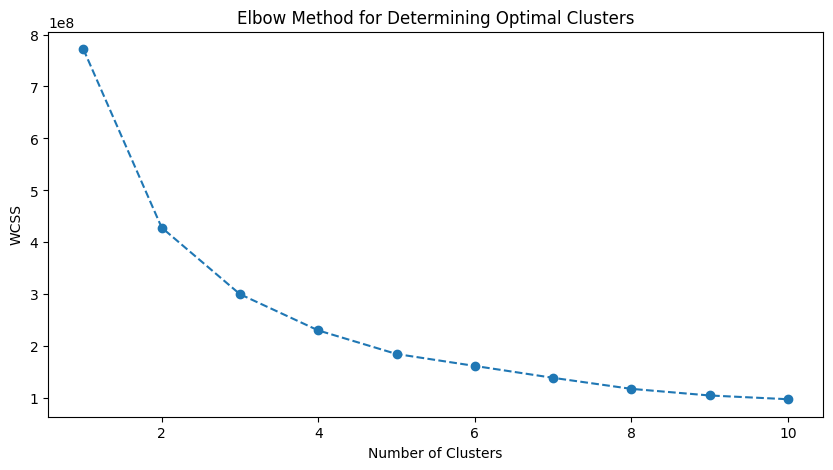

In [ ]:
df_2 = df[df['cluster'] == 0]

# Define your feature set for K-Means, which now includes 'scaled_efficiency'
features_2 = df_2[['latitude', 'longitude', 'price','rent_zestimate', 'area_sqft', 'scaled_efficiency']].values

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    # Perform K-means clustering
    kmeans2 = KMeans(n_clusters=i, init='random', algorithm='full', n_init=10, random_state=42)
    kmeans2.fit(features_2)

    # Compute distances for each point to its cluster center
    centers = np.array([kmeans2.cluster_centers_[label] for label in kmeans2.labels_])
    distances = fractal_distance(features_2, centers)

    # Sum distances to compute WCSS
    wcss_value = np.sum(distances)
    wcss.append(wcss_value)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Perform K-means clustering with k = 3
k = 2
kmeans2 = KMeans(n_clusters=k, init='random', algorithm='full', n_init=10, random_state=42)
kmeans2.fit(features_2)

# Assign the labels to the dataframe
df_2['cluster_2'] = kmeans2.labels_

# Calculate the average investment efficiency for each cluster
cluster_avg_efficiency = df_2.groupby('cluster_2')['investment_efficiency'].mean()

print(cluster_avg_efficiency)

cluster_2
0    0.086323
1    0.000681
Name: investment_efficiency, dtype: float64


In [ ]:
df_2['cluster_2'].value_counts()

cluster_2
0    929
1    494
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_iteration_2 = silhouette_score(features_2, df_2['cluster_2'])

print(f'Silhouette Score: {silhouette_iteration_2}')

Silhouette Score: 0.613147569769679


<Figure size 640x480 with 0 Axes>

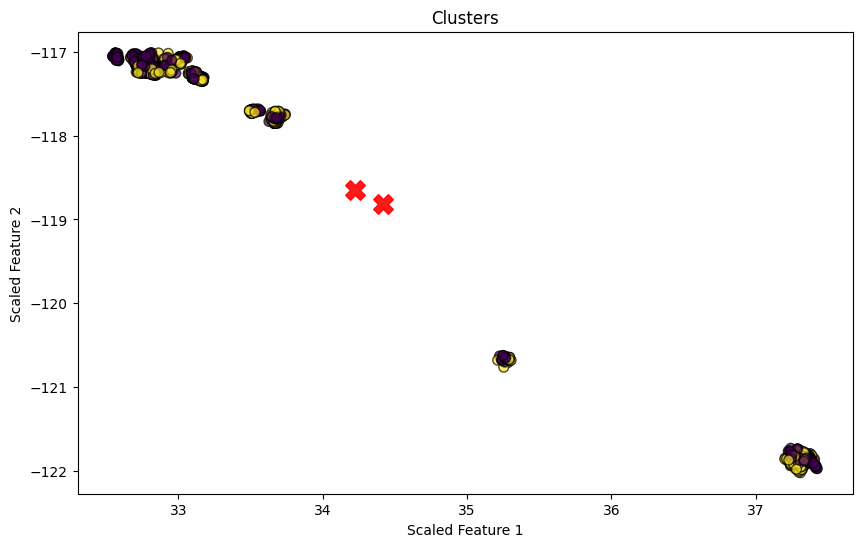

In [ ]:
import matplotlib.pyplot as plt

# Clear any existing plots
plt.clf()

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Plot the data points, colored by their subcluster assignment
plt.scatter(features_2[:, 0], features_2[:, 1], c=df_2['cluster_2'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)

# Plot the subcluster centers
subcluster_centers = kmeans2.cluster_centers_
plt.scatter(subcluster_centers[:, 0], subcluster_centers[:, 1], c='red', s=200, alpha=0.9, marker='X')

# Label the axes
plt.title('Clusters')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')

# Show the plot
plt.show()

## Iteration 3

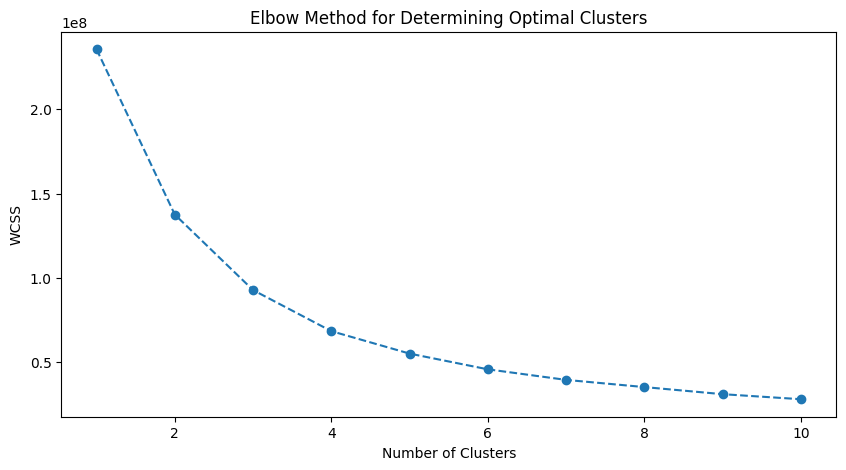

In [ ]:
df_3 = df_2[df_2['cluster_2'] == 0]

# Define your feature set for K-Means, which now includes 'scaled_efficiency'
features_3 = df_3[['latitude', 'longitude', 'price','rent_zestimate', 'area_sqft', 'scaled_efficiency']].values

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    # Perform K-means clustering
    kmeans3 = KMeans(n_clusters=i, init='random', algorithm='full', n_init=10, random_state=42)
    kmeans3.fit(features_3)

    # Compute distances for each point to its cluster center
    centers = np.array([kmeans3.cluster_centers_[label] for label in kmeans3.labels_])
    distances = fractal_distance(features_3, centers)

    # Sum distances to compute WCSS
    wcss_value = np.sum(distances)
    wcss.append(wcss_value)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Perform K-means clustering with k = 3
k = 2
kmeans3 = KMeans(n_clusters=k, init='random', algorithm='full', n_init=10, random_state=42)
kmeans3.fit(features_3)

# Assign the labels to the dataframe
df_3['cluster_3'] = kmeans3.labels_

# Calculate the average investment efficiency for each cluster
cluster_avg_efficiency = df_3.groupby('cluster_3')['investment_efficiency'].mean()

print(cluster_avg_efficiency)

cluster_3
0    0.064612
1    0.108081
Name: investment_efficiency, dtype: float64


In [ ]:
df_3['cluster_3'].value_counts()

cluster_3
0    465
1    464
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_iteration_3 = silhouette_score(features_3, df_3['cluster_3'])

print(f'Silhouette Score: {silhouette_iteration_3}')

Silhouette Score: 0.572139715193068


<Figure size 640x480 with 0 Axes>

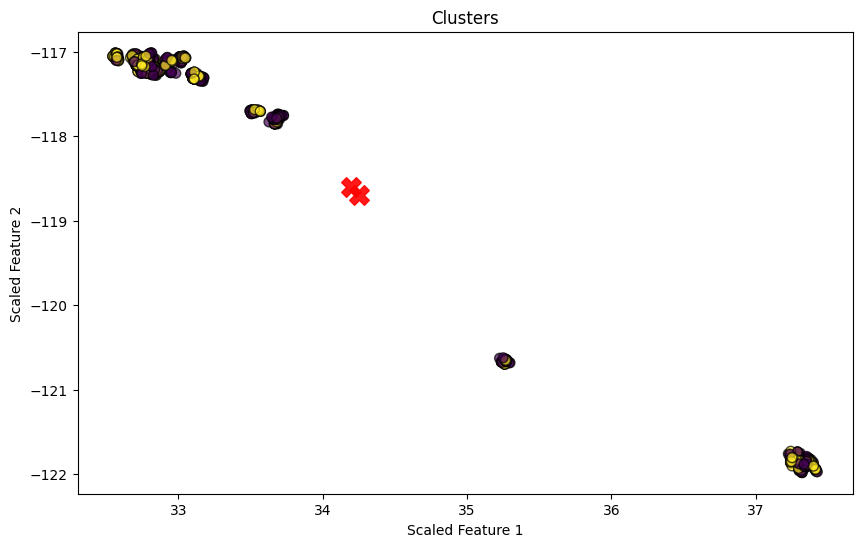

In [ ]:
import matplotlib.pyplot as plt

# Clear any existing plots
plt.clf()

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Plot the data points, colored by their subcluster assignment
plt.scatter(features_3[:, 0], features_3[:, 1], c=df_3['cluster_3'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)

# Plot the subcluster centers
subcluster_centers = kmeans3.cluster_centers_
plt.scatter(subcluster_centers[:, 0], subcluster_centers[:, 1], c='red', s=200, alpha=0.9, marker='X')

# Label the axes
plt.title('Clusters')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')

# Show the plot
plt.show()

## Iteration 4

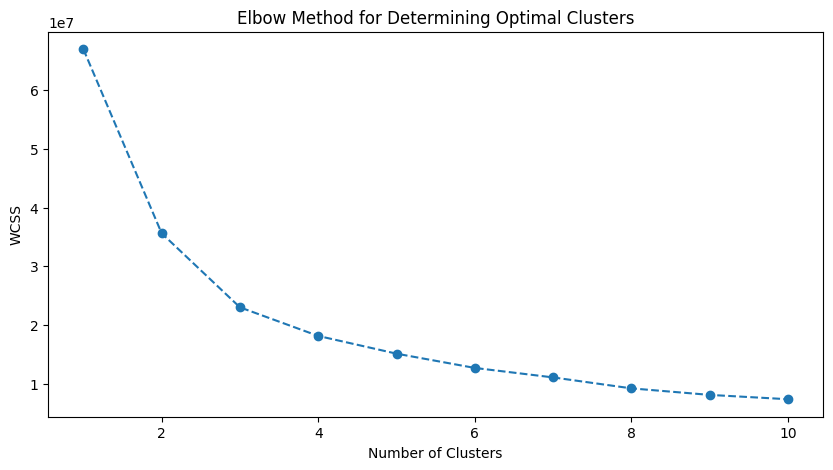

In [ ]:
df_4 = df_3[df_3['cluster_3'] == 1]

# Define your feature set for K-Means, which now includes 'scaled_efficiency'
features_4 = df_4[['latitude', 'longitude', 'price','rent_zestimate', 'area_sqft', 'scaled_efficiency']].values

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    # Perform K-means clustering
    kmeans4 = KMeans(n_clusters=i, init='random', algorithm='full', n_init=10, random_state=42)
    kmeans4.fit(features_4)

    # Compute distances for each point to its cluster center
    centers = np.array([kmeans4.cluster_centers_[label] for label in kmeans4.labels_])
    distances = fractal_distance(features_4, centers)

    # Sum distances to compute WCSS
    wcss_value = np.sum(distances)
    wcss.append(wcss_value)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Perform K-means clustering with k = 3
k = 2
kmeans4 = KMeans(n_clusters=k, init='random', algorithm='full', n_init=10, random_state=42)
kmeans4.fit(features_4)

# Assign the labels to the dataframe
df_4['cluster_4'] = kmeans4.labels_

# Calculate the average investment efficiency for each cluster
cluster_avg_efficiency = df_4.groupby('cluster_4')['investment_efficiency'].mean()

print(cluster_avg_efficiency)

cluster_4
0    0.087897
1    0.122712
Name: investment_efficiency, dtype: float64


In [ ]:
df_4['cluster_4'].value_counts()

cluster_4
1    269
0    195
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for subclusters within Cluster 0
silhouette_iteration_4 = silhouette_score(features_4, df_4['cluster_4'])

print(f'Silhouette Score: {silhouette_iteration_4}')

Silhouette Score: 0.6130473099624807


<Figure size 640x480 with 0 Axes>

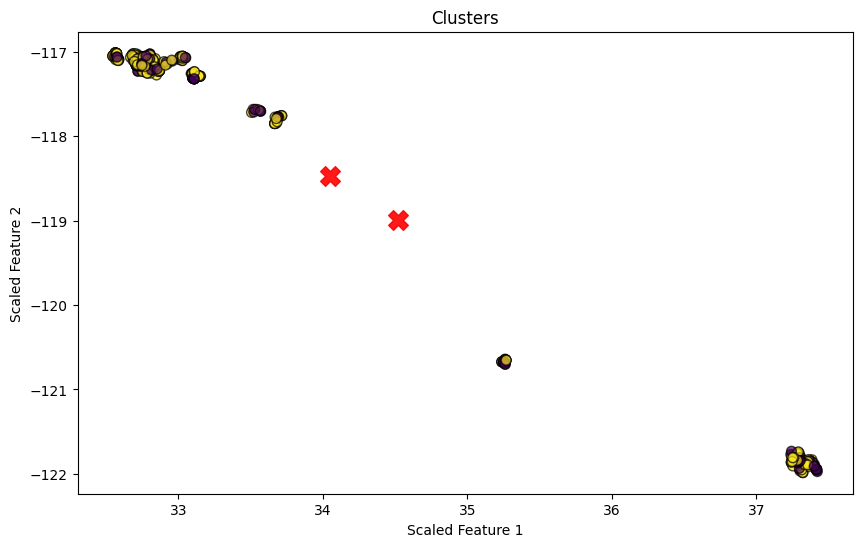

In [ ]:
import matplotlib.pyplot as plt

# Clear any existing plots
plt.clf()

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Plot the data points, colored by their subcluster assignment
plt.scatter(features_4[:, 0], features_4[:, 1], c=df_4['cluster_4'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)

# Plot the subcluster centers
subcluster_centers = kmeans4.cluster_centers_
plt.scatter(subcluster_centers[:, 0], subcluster_centers[:, 1], c='red', s=200, alpha=0.9, marker='X')

# Label the axes
plt.title('Clusters')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')

# Show the plot
plt.show()

## Iteration 5

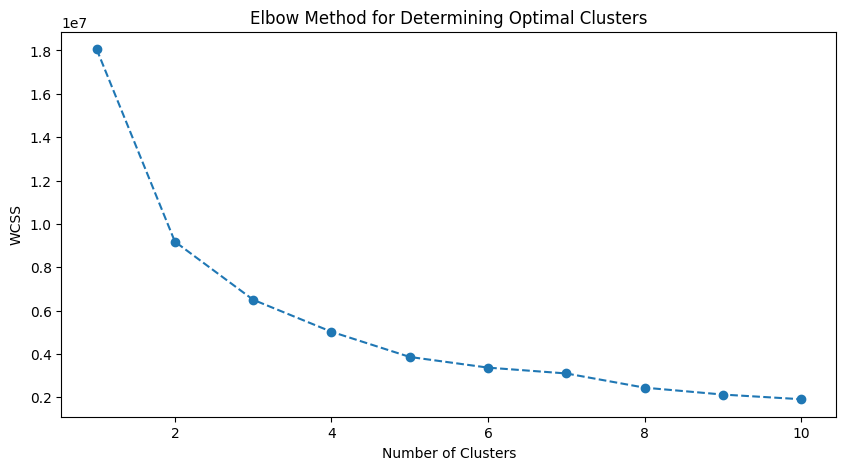

In [ ]:
df_5 = df_4[df_4['cluster_4'] == 0]

# Define your feature set for K-Means, which now includes 'scaled_efficiency'
features_5 = df_5[['latitude', 'longitude', 'price','rent_zestimate', 'area_sqft', 'scaled_efficiency']].values

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    # Perform K-means clustering
    kmeans5 = KMeans(n_clusters=i, init='random', algorithm='full', n_init=10, random_state=42)
    kmeans5.fit(features_5)

    # Compute distances for each point to its cluster center
    centers = np.array([kmeans5.cluster_centers_[label] for label in kmeans5.labels_])
    distances = fractal_distance(features_5, centers)

    # Sum distances to compute WCSS
    wcss_value = np.sum(distances)
    wcss.append(wcss_value)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Perform K-means clustering with k = 2
k = 2
kmeans5 = KMeans(n_clusters=k, init='random', algorithm='full', n_init=10, random_state=42)
kmeans5.fit(features_5)

# Assign the labels to the dataframe
df_5['cluster_5'] = kmeans5.labels_

# Calculate the average investment efficiency for each cluster
cluster_avg_efficiency = df_5.groupby('cluster_5')['investment_efficiency'].mean()

print(cluster_avg_efficiency)

cluster_5
0    0.157802
1    0.009634
Name: investment_efficiency, dtype: float64


In [ ]:
df_5['cluster_5'].value_counts()

cluster_5
0    103
1     92
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_iteration_5 = silhouette_score(features_5, df_5['cluster_5'])

print(f'Silhouette Score: {silhouette_iteration_5}')

Silhouette Score: 0.6221660542330919


<Figure size 640x480 with 0 Axes>

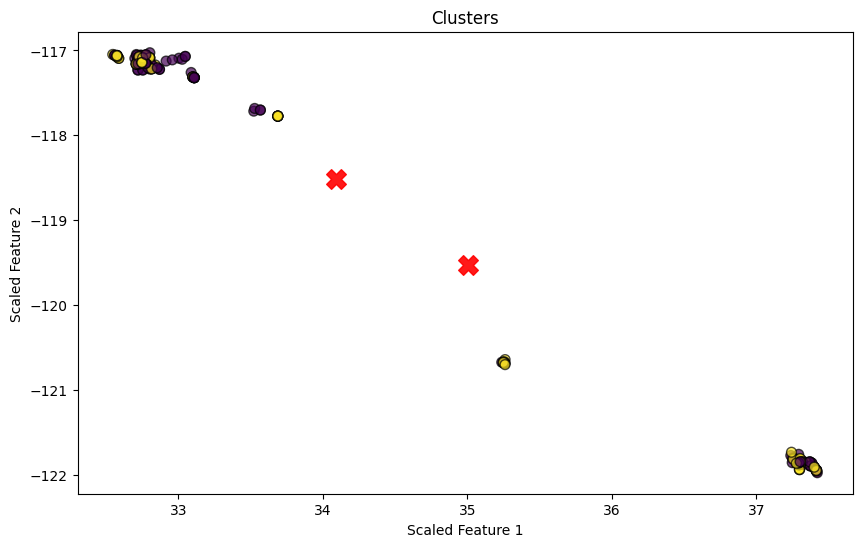

In [ ]:
import matplotlib.pyplot as plt

# Clear any existing plots
plt.clf()

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Plot the data points, colored by their subcluster assignment
plt.scatter(features_5[:, 0], features_5[:, 1], c=df_5['cluster_5'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)

# Plot the subcluster centers
subcluster_centers = kmeans5.cluster_centers_
plt.scatter(subcluster_centers[:, 0], subcluster_centers[:, 1], c='red', s=200, alpha=0.9, marker='X')

# Label the axes
plt.title('Clusters')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')

# Show the plot
plt.show()

## Iteration 6

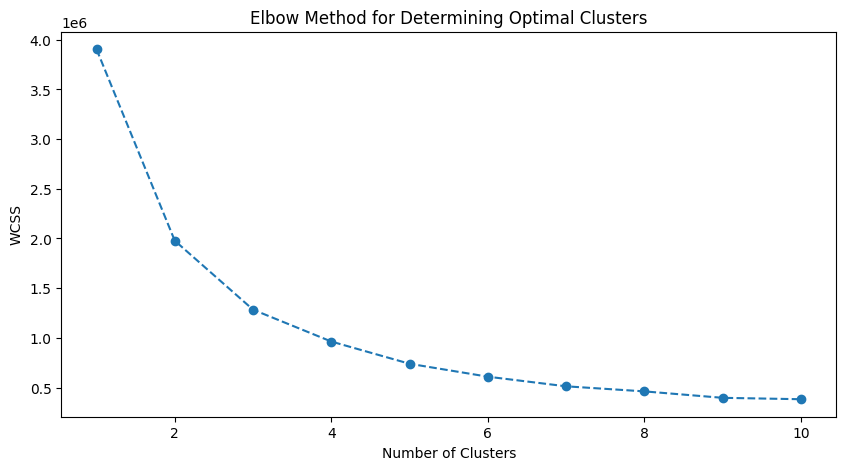

In [ ]:
df_6 = df_5[df_5['cluster_5'] == 0]

# Define your feature set for K-Means, which now includes 'scaled_efficiency'
features_6 = df_6[['latitude', 'longitude', 'price','rent_zestimate', 'area_sqft', 'scaled_efficiency']].values

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    # Perform K-means clustering
    kmeans6 = KMeans(n_clusters=i, init='random', algorithm='full', n_init=10, random_state=42)
    kmeans6.fit(features_6)

    # Compute distances for each point to its cluster center
    centers = np.array([kmeans6.cluster_centers_[label] for label in kmeans6.labels_])
    distances = fractal_distance(features_6, centers)

    # Sum distances to compute WCSS
    wcss_value = np.sum(distances)
    wcss.append(wcss_value)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Perform K-means clustering with k = 2
k = 2
kmeans6 = KMeans(n_clusters=k, init='random', algorithm='full', n_init=10, random_state=42)
kmeans6.fit(features_6)

# Assign the labels to the dataframe
df_6['cluster_6'] = kmeans6.labels_

# Calculate the average investment efficiency for each cluster
cluster_avg_efficiency = df_6.groupby('cluster_6')['investment_efficiency'].mean()

print(cluster_avg_efficiency)

cluster_6
0    0.135268
1    0.173317
Name: investment_efficiency, dtype: float64


In [ ]:
df_6['cluster_6'].value_counts()

cluster_6
1    61
0    42
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_iteration_6 = silhouette_score(features_6, df_6['cluster_6'])

print(f'Silhouette Score: {silhouette_iteration_6}')

Silhouette Score: 0.6432785076321692


<Figure size 640x480 with 0 Axes>

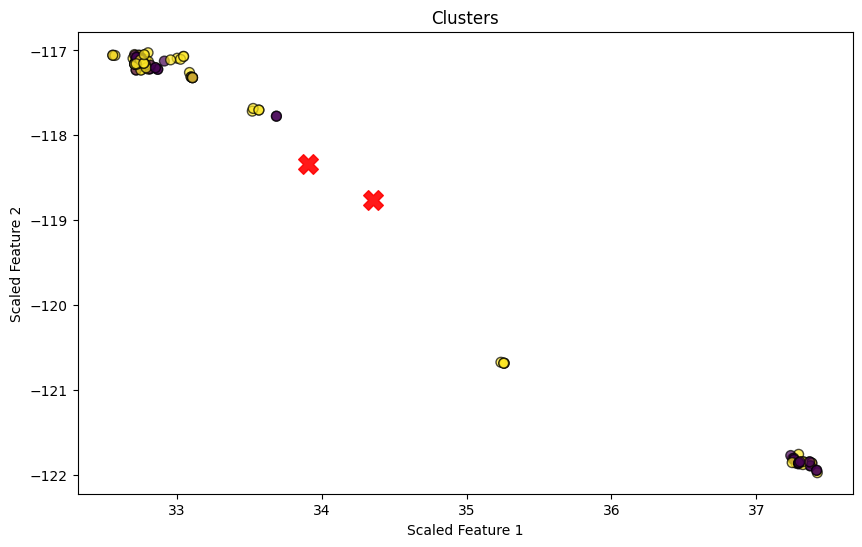

In [ ]:
import matplotlib.pyplot as plt

# Clear any existing plots
plt.clf()

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Plot the data points, colored by their subcluster assignment
plt.scatter(features_6[:, 0], features_6[:, 1], c=df_6['cluster_6'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)

# Plot the subcluster centers
subcluster_centers = kmeans6.cluster_centers_
plt.scatter(subcluster_centers[:, 0], subcluster_centers[:, 1], c='red', s=200, alpha=0.9, marker='X')

# Label the axes
plt.title('Clusters')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')

# Show the plot
plt.show()

# Regression to forecast prices in 1, 2 and 5 years

# Objective

To predict the price of property in the next 1, 2 and 5 years.

We do this by using the average house price change information based on county in a span of last 1, 2 and 5 years.

### Importing Necessary Libraries

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190250 sha256=8db59fdc6bcc9943484899ddc50d86b9be71086d008e41406e36697252b501d4
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
import time
from pyod.models.knn import KNN
from sklearn.preprocessing import LabelEncoder
import datetime

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/midsem/real_estate_data_with_county.csv')
data.head()

,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,status_text,first_line,city,state,area_sqft,house_type,morgage_fee,hoa_fee,county
0,380,16957414,"3219 Polk Ave, San Diego, CA 92104",32.752050,-117.124700,799000,1.0,2.0,582900.0,3354.0,House for sale,3219 Polk Ave,San Diego,CA,810,House,2695.442447,0.000000,San Diego
1,12,19590788,"1801 Willow St, San Jose, CA 95125",37.301167,-121.918724,2350000,3.0,4.0,2489700.0,4995.0,House for sale,1801 Willow St,San Jose,CA,1996,House,7927.771902,376.721004,Santa Clara
2,97,16648030,"841 Kalpati Cir APT A, Carlsbad, CA 92008",33.148010,-117.334816,999900,3.0,2.0,1032800.0,3875.0,Condo for sale,841 Kalpati Cir APT A,Carlsbad,CA,1750,Condo,3373.182606,0.000000,San Diego
3,88,16950592,"3262 Loma Riviera Dr, San Diego, CA 92110",32.756230,-117.225204,795000,2.0,2.0,827200.0,3999.0,Townhouse for sale,3262 Loma Riviera Dr,San Diego,CA,1400,Townhouse,2681.948367,382.195050,San Diego
4,778,16737931,"18614 Caminito Cantilena UNIT 334, San Diego, ...",33.046844,-117.071570,450000,1.0,1.0,450000.0,2394.0,Condo for sale,18614 Caminito Cantilena UNIT 334,San Diego,CA,716,Condo,1518.083981,375.124665,San Diego


### Preprocessing

In [ ]:
data = data.drop(['rank', 'property_id',	'address', 'price', 'status_text', 'first_line',	'city', 'state'], axis = 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'house_type' column
encoded_data = encoder.fit_transform(data[['house_type']])

# The result is a numpy array. To add this back into a DataFrame:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['house_type']))

# Concatenate the new columns with the original DataFrame
data = pd.concat([data, encoded_df], axis=1).drop('house_type', axis=1)

data.head()

,latitude,longitude,bathrooms,bedrooms,zestimate,rent_zestimate,area_sqft,morgage_fee,hoa_fee,county,house_type_Condo,house_type_Home,house_type_House,house_type_Multi-family home,house_type_Townhouse
0,32.752050,-117.124700,1.0,2.0,582900.0,3354.0,810,2695.442447,0.000000,San Diego,0.0,0.0,1.0,0.0,0.0
1,37.301167,-121.918724,3.0,4.0,2489700.0,4995.0,1996,7927.771902,376.721004,Santa Clara,0.0,0.0,1.0,0.0,0.0
2,33.148010,-117.334816,3.0,2.0,1032800.0,3875.0,1750,3373.182606,0.000000,San Diego,1.0,0.0,0.0,0.0,0.0
3,32.756230,-117.225204,2.0,2.0,827200.0,3999.0,1400,2681.948367,382.195050,San Diego,0.0,0.0,0.0,0.0,1.0
4,33.046844,-117.071570,1.0,1.0,450000.0,2394.0,716,1518.083981,375.124665,San Diego,1.0,0.0,0.0,0.0,0.0


Justification on calculation of static values

Now to determine the multiplying factor for the prices after 1, 2 and 5 year, I'm assuming that the trend from past 1 year will be followed the next 1 year, Similarly the trend from the past 2 year will be followed in the upcoming 2 years and same goes for 5 year change.

Now as the trend is going tobe identical the price change in terms of percentage will also be identical. To calculate the percentage change, I modified a dataset from zillow and found the change of average house pricing per county.

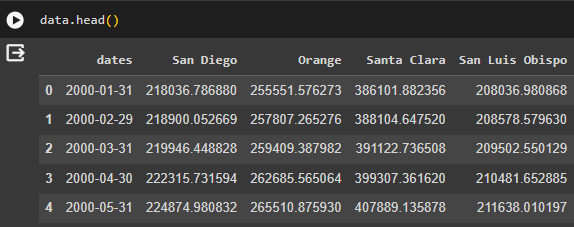

The above file prices start from January 2000 to Feb 2024.

Example of calculation of SanDiego_1 (multipling factor for 1 year for San Diego) would be:

SanDiego_1 = Average Price in San Diego on Feb 29, 2024 / Average Price on Feb 28, 2023 in San Diego

Below Are the average house price change based on county in a span of last 1, 2 and 5 years

In [ ]:
SanDiego_1, SanDiego_2, SanDiego_5, SantaClara_1, SantaClara_2, SantaClara_5, Orange_1, Orange_2, Orange_5, SanLui_1, SanLui_2, SanLui_5  = (1.0933553891529793,
 1.120188871441818,
 1.551028264675151,
 1.072771746462794,
 1.0294963716284666,
 1.272330144478537,
 1.1018898776475492,
 1.1419421983295657,
 1.5203797615867893,
 1.0569939262993515,
 1.0990519159601995,
 1.4235397473981874)

In [ ]:
data_2025 = data.copy()
data_2026 = data.copy()
data_2029 = data.copy()

In [ ]:
# Define the multiplying factors for each county
factors_2025 = {
    "San Diego": SanDiego_1,
    "Santa Clara": SantaClara_1,
    "Orange": Orange_1,
    "San Luis Obispo": SanLui_1
}

# Apply the factors to the relevant columns
for county, factor in factors_2025.items():
    data_2025.loc[data['county'] == county, ['zestimate', 'rent_zestimate', 'hoa_fee', 'morgage_fee']] *= factor

# Define the multiplying factors for each county
factors_2026 = {
    "San Diego": SanDiego_2,
    "Santa Clara": SantaClara_2,
    "Orange": Orange_2,
    "San Luis Obispo": SanLui_2
}

# Apply the factors to the relevant columns
for county, factor in factors_2026.items():
    data_2026.loc[data['county'] == county, ['zestimate', 'rent_zestimate', 'hoa_fee', 'morgage_fee']] *= factor

# Define the multiplying factors for each county
factors_2029 = {
    "San Diego": SanDiego_5,
    "Santa Clara": SantaClara_5,
    "Orange": Orange_5,
    "San Luis Obispo": SanLui_5
}

# Apply the factors to the relevant columns
for county, factor in factors_2029.items():
    data_2029.loc[data['county'] == county, ['zestimate', 'rent_zestimate', 'hoa_fee', 'morgage_fee']] *= factor

In [ ]:
data_2025 = data_2025.drop('county', axis = 1)

In [ ]:
data_2025

,latitude,longitude,bathrooms,bedrooms,zestimate,rent_zestimate,area_sqft,morgage_fee,hoa_fee,house_type_Condo,house_type_Home,house_type_House,house_type_Multi-family home,house_type_Townhouse
0,32.752050,-117.124700,1.0,2.0,6.373169e+05,3667.113975,810,2947.076525,0.000000,0.0,0.0,1.0,0.0,0.0
1,37.301167,-121.918724,3.0,4.0,2.670880e+06,5358.494874,1996,8504.689709,404.135649,0.0,0.0,1.0,0.0,0.0
2,33.148010,-117.334816,3.0,2.0,1.129217e+06,4236.752133,1750,3688.087381,0.000000,1.0,0.0,0.0,0.0,0.0
3,32.756230,-117.225204,2.0,2.0,9.044236e+05,4372.328201,1400,2932.322700,417.875017,0.0,0.0,0.0,0.0,1.0
4,33.046844,-117.071570,1.0,1.0,4.920099e+05,2617.492802,716,1659.805302,410.144574,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,32.775475,-117.050160,2.0,3.0,5.455843e+05,3278.972812,976,1840.539657,0.000000,0.0,0.0,1.0,0.0,0.0
1628,37.315410,-121.902770,3.0,5.0,4.421965e+06,6782.062981,3656,14475.886639,0.000000,0.0,0.0,1.0,0.0,0.0
1629,33.681618,-117.784470,2.0,3.0,9.279015e+05,2809.819188,1121,3159.660370,0.000000,1.0,0.0,0.0,0.0,0.0
1630,33.690094,-117.709220,5.0,5.0,4.499457e+06,8361.140392,3174,14831.817502,0.000000,0.0,0.0,1.0,0.0,0.0


In [ ]:
data_2026 = data_2026.drop('county', axis = 1)

In [ ]:
data_2029 = data_2029.drop('county', axis = 1)

### Defining functions and objects needed for Muller's Loop and Evaluation Plots

In [ ]:
import pickle
import os
#defining functions and objects needed for muller's loop
#Initialize an MLP Regressor
mlp = Sequential()
mlp.add(Dense(64, input_dim=14, activation='relu'))  # Input layer and the first hidden layer with 64 neurons
mlp.add(Dense(64, activation='relu'))  # Second hidden layer with 32 neurons
mlp.add(Dense(16, activation='relu'))  # Second hidden layer with 32 neurons
mlp.add(Dense(1, activation='linear'))  # Output layer with one neuron since it is regression
# Compile the model, using mean_sqaured_error as our loss function
mlp.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Initialize XGBRegressor
xg_reg = XGBRegressor(objective ='reg:squarederror',
                          colsample_bytree = 0.3,
                          learning_rate = 0.1,
                          max_depth = 5,
                          alpha = 10,
                          n_estimators = 10)

#Initialize Linear Regressor
lr = LinearRegression()

#Initializing the ExtraTrees Regressor
et = ExtraTreesRegressor(n_estimators=100, random_state=0)

#Stochastic Gradient Descent Regressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3)

#Initialize RandomForest Regressor
rf = RandomForestRegressor(n_estimators=100,  # Number of trees in the forest
                               max_depth=None,    # Maximum depth of the trees
                               random_state=42)   # Seed for reproducibility

# Initialize the KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)

names = ["MLP Regressor", "Linear Regression", "Random Forest Regressor",
         "KNN Regressor", "XGBoost Regressor", "Extra Trees Regressor", "Stochastic Gradient Descent Regressor"]
#an array of all regressors
regressors =[mlp, lr, rf, knn_reg, xg_reg, et, sgd]
#variable to save the output all runs
mullers_iterations={name:[] for name in names}

def evaluate_regression_model(y_test,y_pred):
  # Evaluating the model using different techniques
  # Calculate metrics
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Print metrics
  print(f"Mean Squared Error (MSE): {mse:f}")
  print(f"Mean Absolute Error (MAE): {mae:f}")
  print(f"R-squared (R2): {r2:f}")
  return mse,mae,r2

def initialize_mlp(X):
    #hnadling different input dim
    #Initialize an MLP Regressor
    mlp = Sequential()
    mlp.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    mlp.add(Dense(64, activation='relu'))
    mlp.add(Dense(16, activation='relu'))
    mlp.add(Dense(1, activation='linear'))
    # Compile the model, using mean_sqaured_error as our loss function
    mlp.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    #update the regressors
    regressors.pop(0)
    regressors.insert(0,mlp)

def run_muller_loop(mullers_iteration_name,X_train,y_train,X_test,y_test,retrain = False):
  initialize_mlp(X)
  min_mse = float('inf')
  max_class = ''
  result = {mullers_iteration_name:[]}
  base_path = '/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/midsem/models/regression'
  # iterate over regressors
  for name, reg in zip(names, regressors):
      file_name = f'{mullers_iteration_name}{name}.pkl'
      path=os.path.join(base_path,file_name)
      start_time = time.time()
      if not os.path.exists(path) or retrain == True:
        #retrain when model not present of when retrain flag is set to true
        if name!='MLP Regressor':
          reg.fit(X_train, y_train)
        else:
        #special case for handling MLP using Keras
          reg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

        #save the model after training
        with open(path,'wb') as f:
          pickle.dump(reg,f)

      else:
        #load the model
        with open(path, 'rb') as f:
          reg = pickle.load(f)


      y_pred = reg.predict(X_test)
      mse,mae,r2=evaluate_regression_model(y_test,y_pred)
      print(f'For {name} MSE {mse}, Training Time = {(time.time() - start_time):2f}')
      result[mullers_iteration_name].append({name:{'MSE':mse,'MAE':mae,'R2':r2}})
      if mse < min_mse:
          reg_best = reg
          min_mse = mse
          max_class = name

  #saving the result
  with open(f'/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/midsem/models/regression_results/{mullers_iteration_name}.pkl','wb') as f:
    pickle.dump(result,f)


  print(80*'-' )
  print('Best --> Regerssor = %s, Score (test, MSE) = %.2f' %(max_class, min_mse))
  return reg_best, result

In [ ]:
def plot_res_reg(y_test,y_pred):
  residuals = y_test - y_pred
  plt.figure(figsize=(10, 6))
  sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
  plt.title('Residuals Plot')
  plt.xlabel('Predicted Values')
  plt.ylabel('Residuals')
  plt.axhline(y=0, color='grey', linestyle='--')
  plt.show()

  # Visualize the model fit
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
  plt.title('Actual vs. Predicted Values')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.show()

# Making Regression Models


We will try to build a regression model that predicts the price of a property multiple years in the future. Our idea is that knowing the amount icnrease in property's value would be a good indicator, to decide if one persom should invest in that property or not.

## Making A Regression Model to forecast price for 2025 i.e. Next Year

In [ ]:
X, y = data_2025.drop('zestimate', axis=1), data_2025['zestimate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=9)

best_reg, result = run_muller_loop('Year_2025', X_train, y_train, X_test, y_test)

11/11 [==============================] - 1s 3ms/step
Mean Squared Error (MSE): 2754403863674.172852
Mean Absolute Error (MAE): 798456.381656
R-squared (R2): 0.748457
For MLP Regressor MSE 2754403863674.173, Training Time = 2.360617
Mean Squared Error (MSE): 31679634559.560104
Mean Absolute Error (MAE): 86591.513798
R-squared (R2): 0.997107
For Linear Regression MSE 31679634559.560104, Training Time = 0.265488
Mean Squared Error (MSE): 296959376104.536865
Mean Absolute Error (MAE): 101500.188004
R-squared (R2): 0.972880
For Random Forest Regressor MSE 296959376104.53687, Training Time = 0.856804
Mean Squared Error (MSE): 1069317967854.263794
Mean Absolute Error (MAE): 186827.023476
R-squared (R2): 0.902346
For KNN Regressor MSE 1069317967854.2638, Training Time = 0.353715
Mean Squared Error (MSE): 4755500098659.754883
Mean Absolute Error (MAE): 826314.421917
R-squared (R2): 0.565708
For XGBoost Regressor MSE 4755500098659.755, Training Time = 0.388680
Mean Squared Error (MSE): 210575699

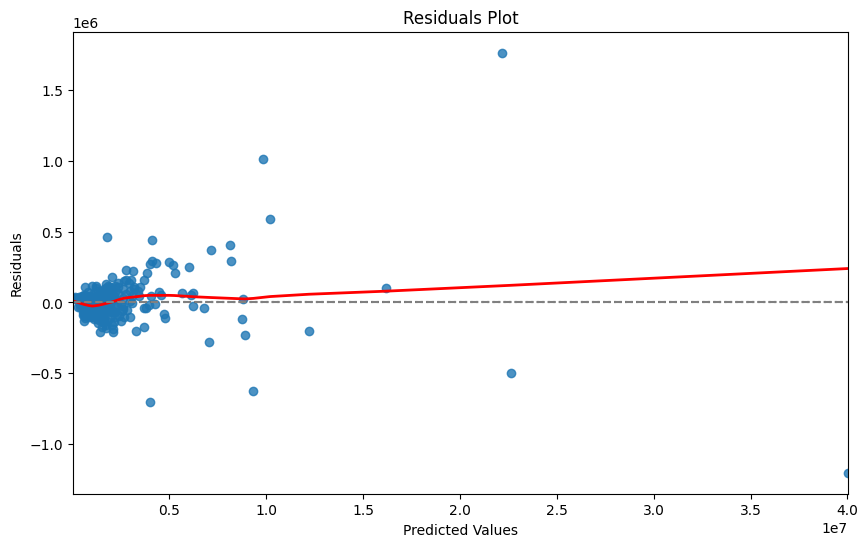

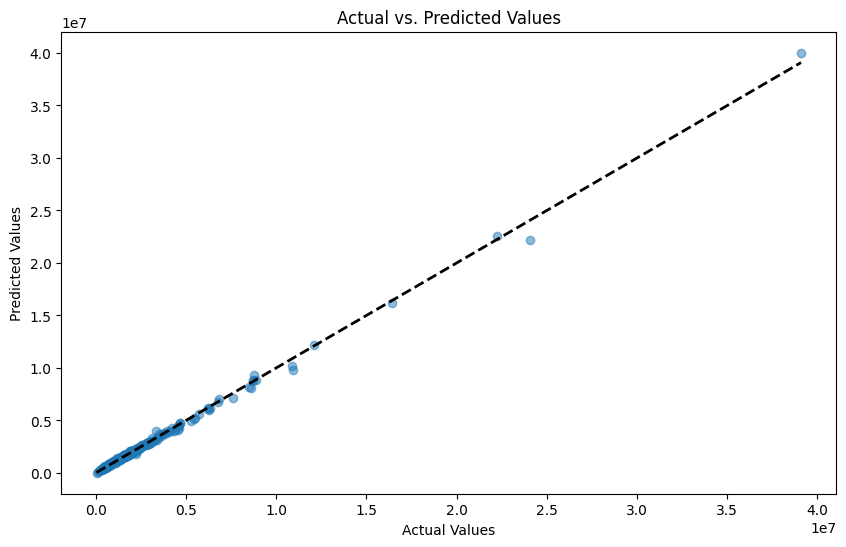

In [ ]:
#visualizing the result
y_pred = best_reg.predict(X_test)
plot_res_reg(y_test,y_pred)

The factors we applied suggest an appreciation in property values across the counties we have data for.

The residuals plot indicates a pattern where residuals increase as the predicted values increase, suggesting heteroscedasticity. The presence of heteroscedasticity means that the model's performance varies at different levels of the dependent variable, and it may not be predicting as accurately for higher-value properties.

Despite this pattern, the lowess line is relatively flat, indicating that the model is consistent across different predicted values but with increasing variance.

The scatter plot of actual vs. predicted values shows a strong linear relationship, suggesting the model can predict property values fairly well.

The points generally follow the diagonal line, which represents perfect predictions. Deviations from this line are errors in prediction.

There are some outliers, particularly at the higher end of property values, indicating that the model may struggle with very high-value properties.

In [ ]:
# Get coefficients
coefficients = best_reg.coef_

# Create a dataframe for easier interpretation
features_importance = pd.DataFrame(coefficients, index=X.columns, columns=['Coefficient'])

# Calculate the absolute values of the coefficients for ranking
features_importance['Absolute'] = features_importance['Coefficient'].abs()

# Sort the features based on absolute value of coefficients
features_importance = features_importance.sort_values(by='Absolute', ascending=False)

print(features_importance)

                               Coefficient      Absolute
house_type_Home              -71885.416976  71885.416976
house_type_House              53782.189910  53782.189910
latitude                      40893.296337  40893.296337
longitude                     30203.488633  30203.488633
house_type_Multi-family home  26131.478542  26131.478542
bathrooms                     15724.729042  15724.729042
bedrooms                       8390.518201   8390.518201
house_type_Townhouse          -7912.937385   7912.937385
morgage_fee                     261.940709    261.940709
house_type_Condo               -115.314091    115.314091
area_sqft                        21.411269     21.411269
rent_zestimate                    7.152751      7.152751
hoa_fee                           4.550293      4.550293


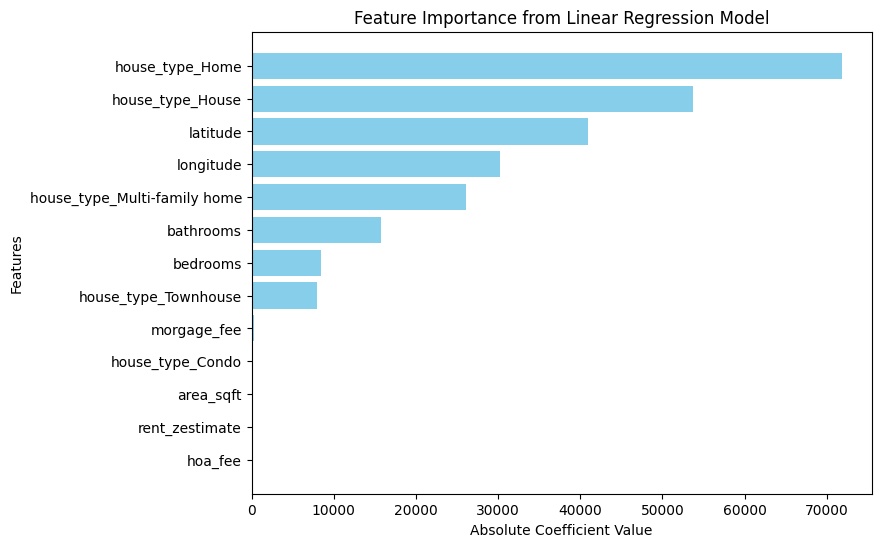

In [ ]:
import matplotlib.pyplot as plt

# Assuming features_importance is the DataFrame with coefficients and their absolute values

# Sort features based on importance
features_importance_sorted = features_importance.sort_values(by='Absolute', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(features_importance_sorted.index, features_importance_sorted['Absolute'], color='skyblue')
ax.set_xlabel('Absolute Coefficient Value')
ax.set_ylabel('Features')
ax.set_title('Feature Importance from Linear Regression Model')

plt.show()

The "hoa_fee" has the highest coefficient, indicating it is the most significant predictor in this model. The next most important features are "rent_zestimate" and "area_sqft," with "house_type_Condo" and "morgage_fee" following in importance. In contrast, "house_type_Home," "house_type_House," and geographical coordinates ("latitude" and "longitude") are shown to have the least impact on the model’s predictions.

## Making A Regression Model to forecast price for 2026 (2 Years in the Future)

In [ ]:
X, y = data_2026.drop('zestimate', axis=1), data_2026['zestimate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=9)

best_reg, result = run_muller_loop('Year_2026', X_train, y_train, X_test, y_test)

11/11 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 2149566412297.231934
Mean Absolute Error (MAE): 673850.735814
R-squared (R2): 0.813925
For MLP Regressor MSE 2149566412297.232, Training Time = 1.388288
Mean Squared Error (MSE): 33289478189.277225
Mean Absolute Error (MAE): 87261.974498
R-squared (R2): 0.997118
For Linear Regression MSE 33289478189.277225, Training Time = 1.416541
Mean Squared Error (MSE): 330709216659.891724
Mean Absolute Error (MAE): 99851.244754
R-squared (R2): 0.971372
For Random Forest Regressor MSE 330709216659.8917, Training Time = 0.598888
Mean Squared Error (MSE): 1078472754652.075684
Mean Absolute Error (MAE): 184974.881384
R-squared (R2): 0.906643
For KNN Regressor MSE 1078472754652.0757, Training Time = 0.311800
Mean Squared Error (MSE): 5023787986375.170898
Mean Absolute Error (MAE): 848440.585442
R-squared (R2): 0.565121
For XGBoost Regressor MSE 5023787986375.171, Training Time = 0.262122
Mean Squared Error (MSE): 26848520419

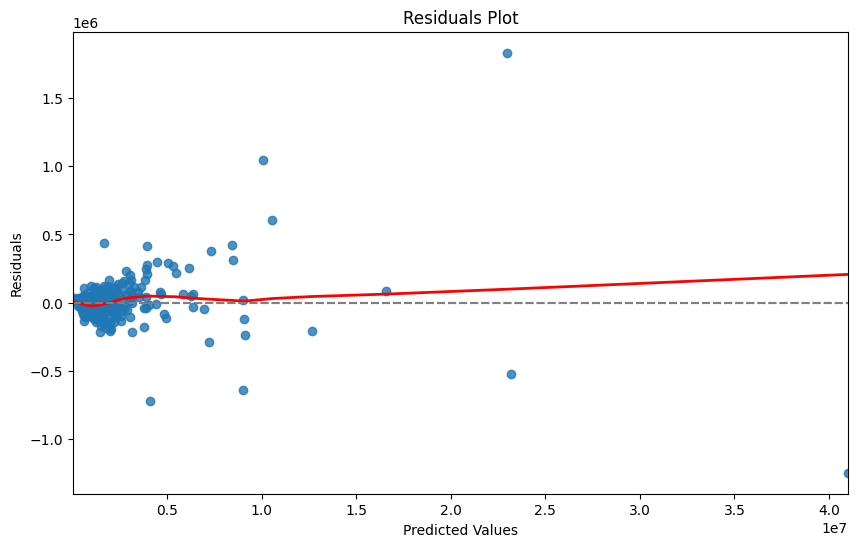

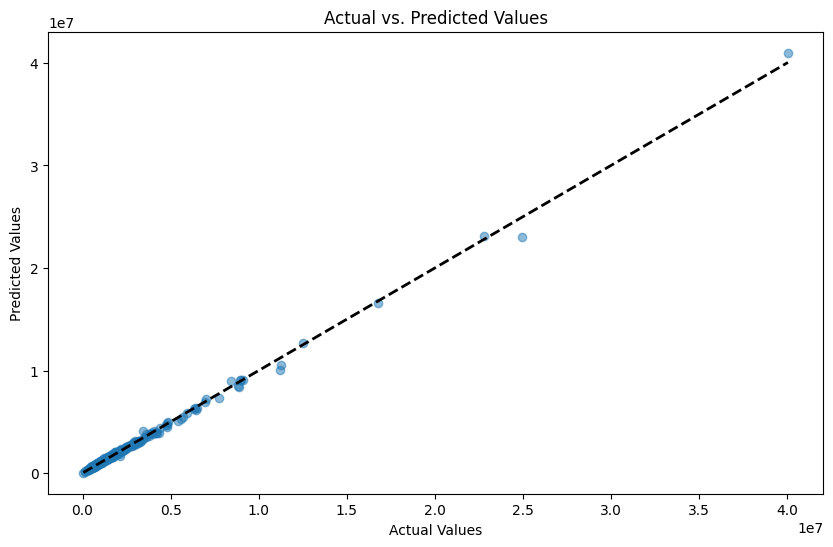

In [ ]:
#visualizing the result
y_pred = best_reg.predict(X_test)
plot_res_reg(y_test,y_pred)

**Residuals Plot:**

The residuals are fairly randomly distributed, which is a good sign that the model doesn't suffer from heteroscedasticity.

Most residuals are clustered near the zero line, indicating good performance for lower-priced properties.

However, there is a pattern where higher-priced properties have higher residuals, suggesting that the model is less accurate for higher-valued homes.

**Actual vs. Predicted Plot**:

The predicted values are closely aligned with the actual values, especially for lower and medium-range properties, as shown by the proximity to the dashed line representing perfect predictions.

The model appears to underestimate the value of the highest-priced homes, as evidenced by the points deviating from the line in the upper right.

**Model Performance:**

The model seems to perform well, with a trend line that matches the diagonal (indicating accurate predictions) for a significant part of the data.

The model's performance drops for very high-value predictions, which could suggest that non-linear factors or interactions between features that affect higher property values are not being captured.

In [ ]:
# Get coefficients
coefficients = best_reg.coef_

# Create a dataframe for easier interpretation
features_importance = pd.DataFrame(coefficients, index=X.columns, columns=['Coefficient'])

# Calculate the absolute values of the coefficients for ranking
features_importance['Absolute'] = features_importance['Coefficient'].abs()

# Sort the features based on absolute value of coefficients
features_importance = features_importance.sort_values(by='Absolute', ascending=False)

print(features_importance)

                               Coefficient      Absolute
house_type_Home              -69946.616820  69946.616820
house_type_House              54437.288703  54437.288703
latitude                      38474.856653  38474.856653
longitude                     29914.860657  29914.860657
house_type_Multi-family home  23987.788278  23987.788278
bathrooms                     17190.950272  17190.950272
house_type_Townhouse          -8779.181452   8779.181452
bedrooms                       8034.136102   8034.136102
house_type_Condo                300.721291    300.721291
morgage_fee                     261.802668    261.802668
area_sqft                        21.668544     21.668544
rent_zestimate                    7.210968      7.210968
hoa_fee                           4.863456      4.863456


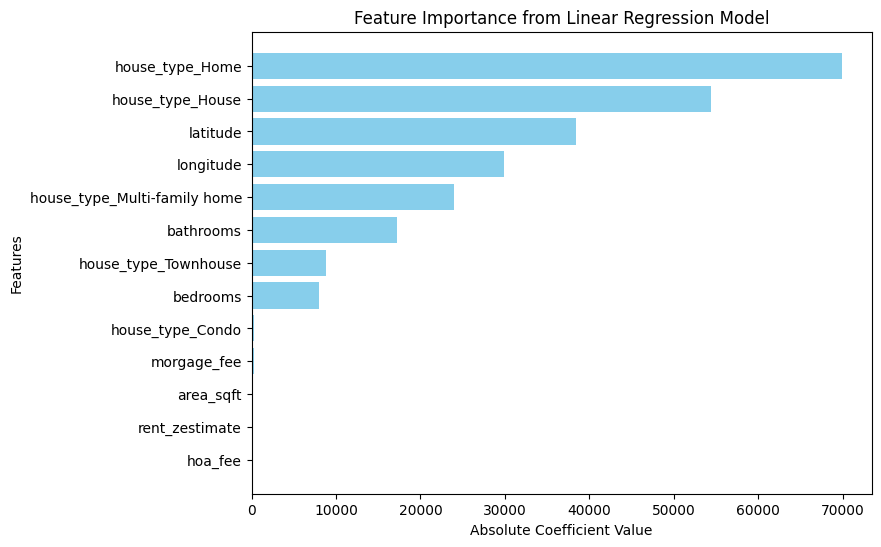

In [ ]:
import matplotlib.pyplot as plt

# Assuming features_importance is the DataFrame with coefficients and their absolute values

# Sort features based on importance
features_importance_sorted = features_importance.sort_values(by='Absolute', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(features_importance_sorted.index, features_importance_sorted['Absolute'], color='skyblue')
ax.set_xlabel('Absolute Coefficient Value')
ax.set_ylabel('Features')
ax.set_title('Feature Importance from Linear Regression Model')

plt.show()

## Making A Regression Model to forecast price for 2029 (5 Years in the Future)

In [ ]:
X, y = data_2029.drop('zestimate', axis=1), data_2029['zestimate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=9)

best_reg, result = run_muller_loop('Year_2029', X_train, y_train, X_test, y_test)

11/11 [==============================] - 0s 7ms/step
Mean Squared Error (MSE): 4820159856363.594727
Mean Absolute Error (MAE): 1051281.958266
R-squared (R2): 0.777173
For MLP Regressor MSE 4820159856363.595, Training Time = 1.188018
Mean Squared Error (MSE): 59709424705.805023
Mean Absolute Error (MAE): 115704.566963
R-squared (R2): 0.997240
For Linear Regression MSE 59709424705.80502, Training Time = 0.264816
Mean Squared Error (MSE): 586243258364.706055
Mean Absolute Error (MAE): 143685.118665
R-squared (R2): 0.972899
For Random Forest Regressor MSE 586243258364.706, Training Time = 0.745321
Mean Squared Error (MSE): 2155020369073.820312
Mean Absolute Error (MAE): 264031.095679
R-squared (R2): 0.900378
For KNN Regressor MSE 2155020369073.8203, Training Time = 0.326810
Mean Squared Error (MSE): 9564619891932.345703
Mean Absolute Error (MAE): 1154941.548071
R-squared (R2): 0.557846
For XGBoost Regressor MSE 9564619891932.346, Training Time = 0.325798
Mean Squared Error (MSE): 536965853

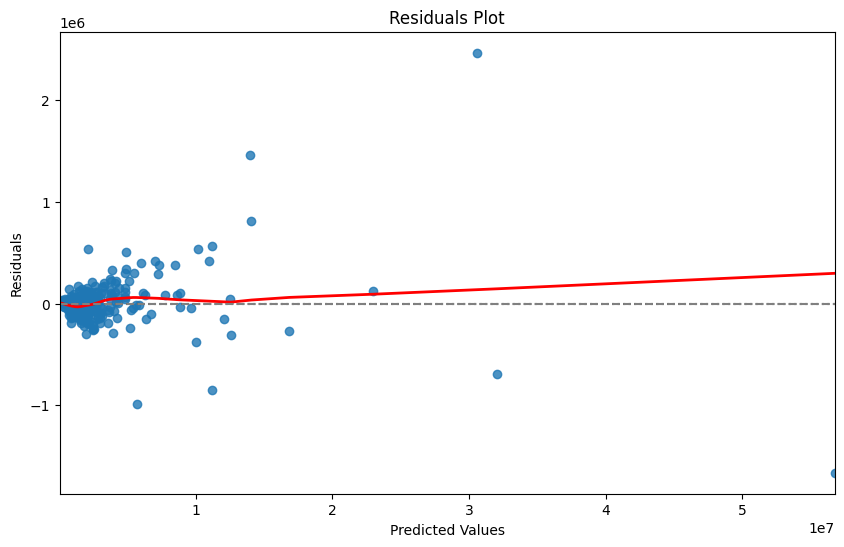

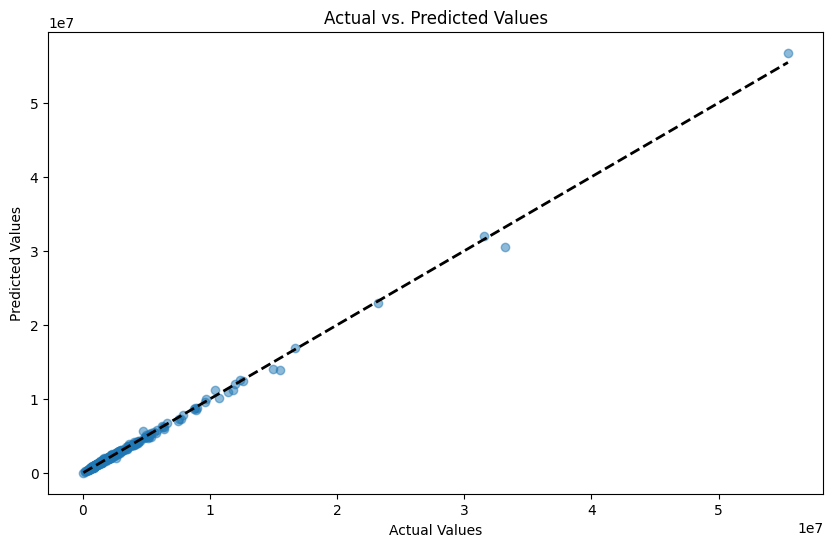

In [ ]:
#visualizing the result
y_pred = best_reg.predict(X_test)
plot_res_reg(y_test,y_pred)

**Residuals Plot:**

Similar to previous models, the residuals are mostly centered around the horizontal zero line, which indicates a good fit for a significant portion of the data.

There is an increased spread in residuals as the predicted values get larger, suggesting the model is less accurate for predicting higher-priced homes.


**Actual vs. Predicted Plot:**

The data points are aligned along the diagonal line, showing a good match between the actual and predicted values, particularly for properties valued at the lower end of the price range.

There are several data points that deviate significantly from the diagonal at higher price ranges, indicating potential underestimation or overestimation for these properties.





In [ ]:
# Get coefficients
coefficients = best_reg.coef_

# Create a dataframe for easier interpretation
features_importance = pd.DataFrame(coefficients, index=X.columns, columns=['Coefficient'])

# Calculate the absolute values of the coefficients for ranking
features_importance['Absolute'] = features_importance['Coefficient'].abs()

# Sort the features based on absolute value of coefficients
features_importance = features_importance.sort_values(by='Absolute', ascending=False)

print(features_importance)

                               Coefficient      Absolute
house_type_Home              -88059.513744  88059.513744
house_type_House              72149.653929  72149.653929
latitude                      46170.715141  46170.715141
longitude                     39554.415361  39554.415361
house_type_Multi-family home  30172.576643  30172.576643
bathrooms                     24856.474869  24856.474869
house_type_Townhouse         -14069.468655  14069.468655
bedrooms                      10059.086362  10059.086362
morgage_fee                     261.700703    261.700703
house_type_Condo               -193.248172    193.248172
area_sqft                        27.959512     27.959512
rent_zestimate                    7.378017      7.378017
hoa_fee                           3.046966      3.046966


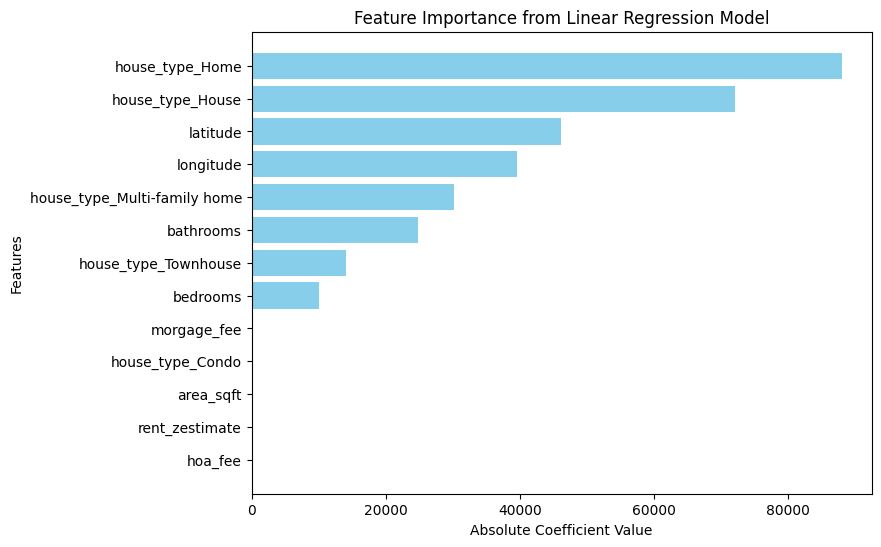

In [ ]:
import matplotlib.pyplot as plt

# Assuming features_importance is the DataFrame with coefficients and their absolute values

# Sort features based on importance
features_importance_sorted = features_importance.sort_values(by='Absolute', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(features_importance_sorted.index, features_importance_sorted['Absolute'], color='skyblue')
ax.set_xlabel('Absolute Coefficient Value')
ax.set_ylabel('Features')
ax.set_title('Feature Importance from Linear Regression Model')

plt.show()

he feature "hoa_fee" has the least importance. On the other hand, "house_type_Home" has the most significant impact. "rent_zestimate" and "area_sqft" also show no importance with relatively. Features such as "bedrooms," "house_type_Townhouse," and "bathrooms" have moderate importance. The latitude and longitude have very high impact according to this chart

# Lets Perform the Same Loop with Latent Variable Crime Rates

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/midsem/real_estate_data_with_county.csv')
data2 = pd.read_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/midsem/final_real_estate_data.csv')

In [ ]:
data1.head()

,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,status_text,first_line,city,state,area_sqft,house_type,morgage_fee,hoa_fee,county
0,380,16957414,"3219 Polk Ave, San Diego, CA 92104",32.752050,-117.124700,799000,1.0,2.0,582900.0,3354.0,House for sale,3219 Polk Ave,San Diego,CA,810,House,2695.442447,0.000000,San Diego
1,12,19590788,"1801 Willow St, San Jose, CA 95125",37.301167,-121.918724,2350000,3.0,4.0,2489700.0,4995.0,House for sale,1801 Willow St,San Jose,CA,1996,House,7927.771902,376.721004,Santa Clara
2,97,16648030,"841 Kalpati Cir APT A, Carlsbad, CA 92008",33.148010,-117.334816,999900,3.0,2.0,1032800.0,3875.0,Condo for sale,841 Kalpati Cir APT A,Carlsbad,CA,1750,Condo,3373.182606,0.000000,San Diego
3,88,16950592,"3262 Loma Riviera Dr, San Diego, CA 92110",32.756230,-117.225204,795000,2.0,2.0,827200.0,3999.0,Townhouse for sale,3262 Loma Riviera Dr,San Diego,CA,1400,Townhouse,2681.948367,382.195050,San Diego
4,778,16737931,"18614 Caminito Cantilena UNIT 334, San Diego, ...",33.046844,-117.071570,450000,1.0,1.0,450000.0,2394.0,Condo for sale,18614 Caminito Cantilena UNIT 334,San Diego,CA,716,Condo,1518.083981,375.124665,San Diego


In [ ]:
data2.head()

,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,...,property_url,listing_url,first_line,city,state,zip,area_sqft,county,violent_crimes,property_crimes
0,380,16957414,"3219 Polk Ave, San Diego, CA 92104",32.752050,-117.124700,799000,1.0,2.0,582900.0,3354.0,...,https://www.zillow.com/homedetails/3219-Polk-A...,https://www.zillow.com/san-diego-ca/10_p/,3219 Polk Ave,San Diego,CA,92104,810.0,San Diego,341.554921,1653.528173
1,12,19590788,"1801 Willow St, San Jose, CA 95125",37.301167,-121.918724,2350000,3.0,4.0,2489700.0,4995.0,...,https://www.zillow.com/homedetails/1801-Willow...,"https://www.zillow.com/homes/San-Jose,-CA_rb/",1801 Willow St,San Jose,CA,95125,1996.0,Santa Clara,325.398640,2435.297542
2,97,16648030,"841 Kalpati Cir APT A, Carlsbad, CA 92008",33.148010,-117.334816,999900,3.0,2.0,1032800.0,3875.0,...,https://www.zillow.com/homedetails/841-Kalpati...,https://www.zillow.com/carlsbad-ca/3_p/,841 Kalpati Cir APT A,Carlsbad,CA,92008,1750.0,San Diego,341.554921,1653.528173
3,88,16950592,"3262 Loma Riviera Dr, San Diego, CA 92110",32.756230,-117.225204,795000,2.0,2.0,827200.0,3999.0,...,https://www.zillow.com/homedetails/3262-Loma-R...,https://www.zillow.com/san-diego-ca/3_p/,3262 Loma Riviera Dr,San Diego,CA,92110,1400.0,San Diego,341.554921,1653.528173
4,778,16737931,"18614 Caminito Cantilena UNIT 334, San Diego, ...",33.046844,-117.071570,450000,1.0,1.0,NaN,2394.0,...,https://www.zillow.com/homedetails/18614-Camin...,https://www.zillow.com/san-diego-ca/19_p/,18614 Caminito Cantilena UNIT 334,San Diego,CA,92128,716.0,San Diego,341.554921,1653.528173


In [ ]:
data = pd.merge(data1, data2[['property_id', 'property_crimes', 'violent_crimes']], on='property_id', how='left')

### Preprocessing

In [ ]:
data = data.drop(['rank', 'property_id',	'address', 'price', 'status_text', 'first_line',	'city', 'state'], axis = 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'house_type' column
encoded_data = encoder.fit_transform(data[['house_type']])

# The result is a numpy array. To add this back into a DataFrame:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['house_type']))

# Concatenate the new columns with the original DataFrame
data = pd.concat([data, encoded_df], axis=1).drop('house_type', axis=1)

data.head()

,latitude,longitude,bathrooms,bedrooms,zestimate,rent_zestimate,area_sqft,morgage_fee,hoa_fee,county,property_crimes,violent_crimes,house_type_Condo,house_type_Home,house_type_House,house_type_Multi-family home,house_type_Townhouse
0,32.752050,-117.124700,1.0,2.0,582900.0,3354.0,810,2695.442447,0.000000,San Diego,1653.528173,341.554921,0.0,0.0,1.0,0.0,0.0
1,37.301167,-121.918724,3.0,4.0,2489700.0,4995.0,1996,7927.771902,376.721004,Santa Clara,2435.297542,325.398640,0.0,0.0,1.0,0.0,0.0
2,33.148010,-117.334816,3.0,2.0,1032800.0,3875.0,1750,3373.182606,0.000000,San Diego,1653.528173,341.554921,1.0,0.0,0.0,0.0,0.0
3,32.756230,-117.225204,2.0,2.0,827200.0,3999.0,1400,2681.948367,382.195050,San Diego,1653.528173,341.554921,0.0,0.0,0.0,0.0,1.0
4,33.046844,-117.071570,1.0,1.0,450000.0,2394.0,716,1518.083981,375.124665,San Diego,1653.528173,341.554921,1.0,0.0,0.0,0.0,0.0


In [ ]:
data_2025_latent = data.copy()
data_2026_latent = data.copy()
data_2029_latent = data.copy()

In [ ]:
# Define the multiplying factors for each county
factors_2025 = {
    "San Diego": SanDiego_1,
    "Santa Clara": SantaClara_1,
    "Orange": Orange_1,
    "San Luis Obispo": SanLui_1
}

# Apply the factors to the relevant columns
for county, factor in factors_2025.items():
    data_2025_latent.loc[data['county'] == county, ['zestimate', 'rent_zestimate', 'hoa_fee', 'morgage_fee']] *= factor

# Define the multiplying factors for each county
factors_2026 = {
    "San Diego": SanDiego_2,
    "Santa Clara": SantaClara_2,
    "Orange": Orange_2,
    "San Luis Obispo": SanLui_2
}

# Apply the factors to the relevant columns
for county, factor in factors_2026.items():
    data_2026_latent.loc[data['county'] == county, ['zestimate', 'rent_zestimate', 'hoa_fee', 'morgage_fee']] *= factor

# Define the multiplying factors for each county
factors_2029 = {
    "San Diego": SanDiego_5,
    "Santa Clara": SantaClara_5,
    "Orange": Orange_5,
    "San Luis Obispo": SanLui_5
}

# Apply the factors to the relevant columns
for county, factor in factors_2029.items():
    data_2029_latent.loc[data['county'] == county, ['zestimate', 'rent_zestimate', 'hoa_fee', 'morgage_fee']] *= factor

In [ ]:
data_2025_latent = data_2025_latent.drop('county', axis = 1)

In [ ]:
data_2026_latent = data_2026_latent.drop('county', axis = 1)

In [ ]:
data_2029_latent = data_2029_latent.drop('county', axis = 1)

## Making A Regression Model to forecast price for 2025 with Latent Variables

In [ ]:
X, y = data_2025_latent.drop('zestimate', axis=1), data_2025_latent['zestimate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=9)

best_reg, result = run_muller_loop('Year_2025_Latent', X_train, y_train, X_test, y_test)

11/11 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 2083190401872.454834
Mean Absolute Error (MAE): 735169.007293
R-squared (R2): 0.640681
For MLP Regressor MSE 2083190401872.4548, Training Time = 1.177197
Mean Squared Error (MSE): 20650978672.295345
Mean Absolute Error (MAE): 70494.517983
R-squared (R2): 0.996438
For Linear Regression MSE 20650978672.295345, Training Time = 0.269859
Mean Squared Error (MSE): 16569399422.518229
Mean Absolute Error (MAE): 58524.212549
R-squared (R2): 0.997142
For Random Forest Regressor MSE 16569399422.518229, Training Time = 0.862023
Mean Squared Error (MSE): 210222056265.563324
Mean Absolute Error (MAE): 106844.117768
R-squared (R2): 0.963740
For KNN Regressor MSE 210222056265.56332, Training Time = 0.296304
Mean Squared Error (MSE): 1536074472942.311279
Mean Absolute Error (MAE): 556258.765500
R-squared (R2): 0.735051
For XGBoost Regressor MSE 1536074472942.3113, Training Time = 0.359053
Mean Squared Error (MSE): 1935125276

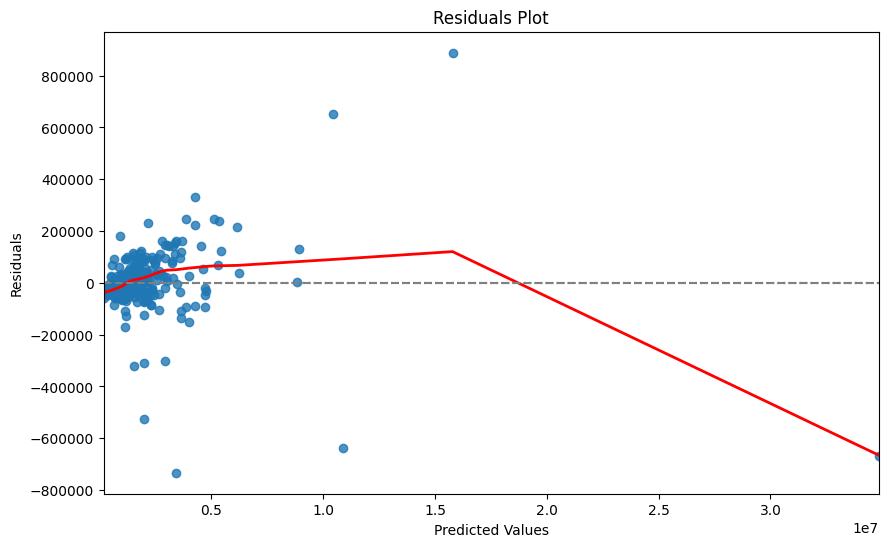

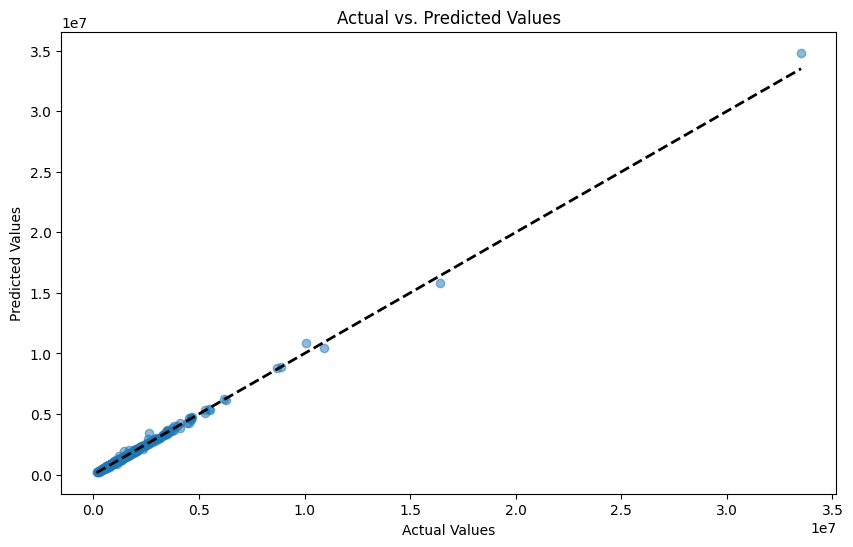

In [ ]:
#visualizing the result
y_pred = best_reg.predict(X_test)
plot_res_reg(y_test,y_pred)

The residuals plot shows some pattern - as predicted values increase, the residuals tend to be more spread out, suggesting that the model may have more difficulty predicting higher value homes accurately.

The actual vs. predicted values plot indicates a strong linear relationship for lower-priced homes, but deviations are noticeable at higher price points, supporting the residuals plot observations.

The inclusion of crime rates is based on the hypothesis that crime rates have an impact on property values, which is a realistic consideration in real estate valuation.

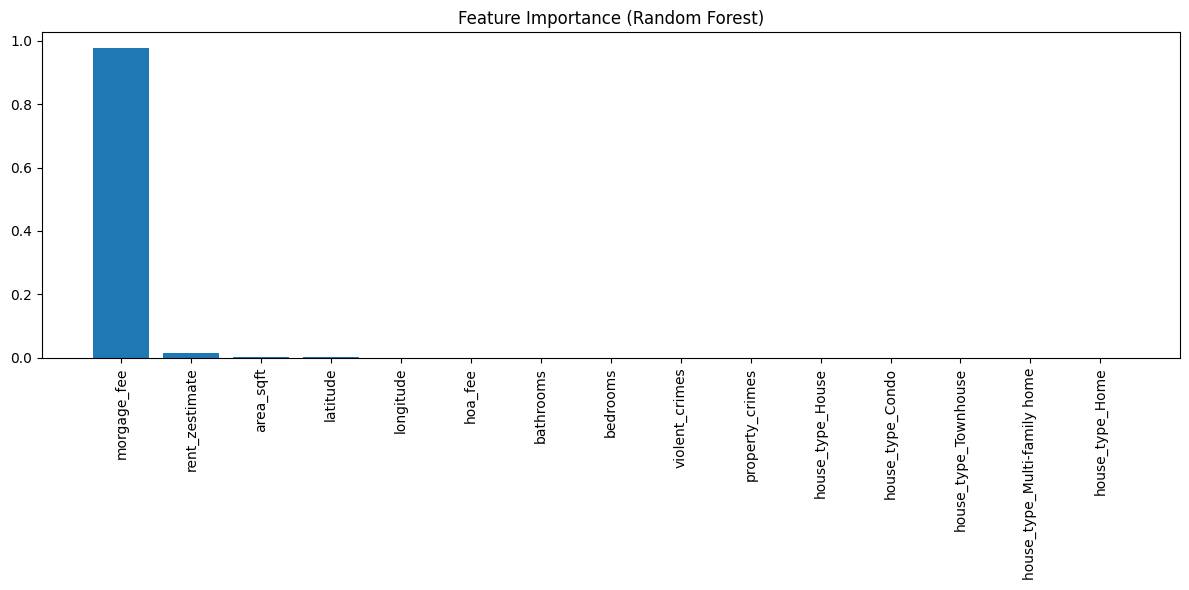

In [ ]:
feature_importances_rf = best_reg.feature_importances_
# Sort the feature importance in descending order
sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importance (Random Forest)')
plt.bar(range(X.shape[1]), feature_importances_rf[sorted_indices_rf], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices_rf], rotation=90)
plt.tight_layout()
plt.show()

"mortgage_fee" emerges as the predominant predictor with an importance score near 1. The feature "rent_zestimate" holds some significance but is considerably less influential than "mortgage_fee". The remaining features, including property attributes like "area_sqft", "bathrooms", "bedrooms", crime rates, and various property types, have minimal to no discernible impact on the model's predictions. This suggests a heavy reliance on "mortgage_fee" within the model for accurate forecasting, potentially overshadowing the contribution of other variables in this specific analysis.

## Making A Regression Model to forecast price for 2026 with Latent Variables  

In [ ]:
X, y = data_2026_latent.drop('zestimate', axis=1), data_2026_latent['zestimate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=9)

best_reg, result = run_muller_loop('Year_2026_latent', X_train, y_train, X_test, y_test)

11/11 [==============================] - 0s 7ms/step
Mean Squared Error (MSE): 1424555554313.131592
Mean Absolute Error (MAE): 558434.295955
R-squared (R2): 0.766080
For MLP Regressor MSE 1424555554313.1316, Training Time = 1.690801
Mean Squared Error (MSE): 21277327668.376865
Mean Absolute Error (MAE): 70935.507959
R-squared (R2): 0.996506
For Linear Regression MSE 21277327668.376865, Training Time = 0.336589
Mean Squared Error (MSE): 22335481618.561680
Mean Absolute Error (MAE): 62857.505118
R-squared (R2): 0.996332
For Random Forest Regressor MSE 22335481618.56168, Training Time = 0.627137
Mean Squared Error (MSE): 215804738319.246887
Mean Absolute Error (MAE): 106395.881410
R-squared (R2): 0.964564
For KNN Regressor MSE 215804738319.2469, Training Time = 0.263630
Mean Squared Error (MSE): 1592421926525.019531
Mean Absolute Error (MAE): 570641.902761
R-squared (R2): 0.738515
For XGBoost Regressor MSE 1592421926525.0195, Training Time = 0.328203
Mean Squared Error (MSE): 23903042382.

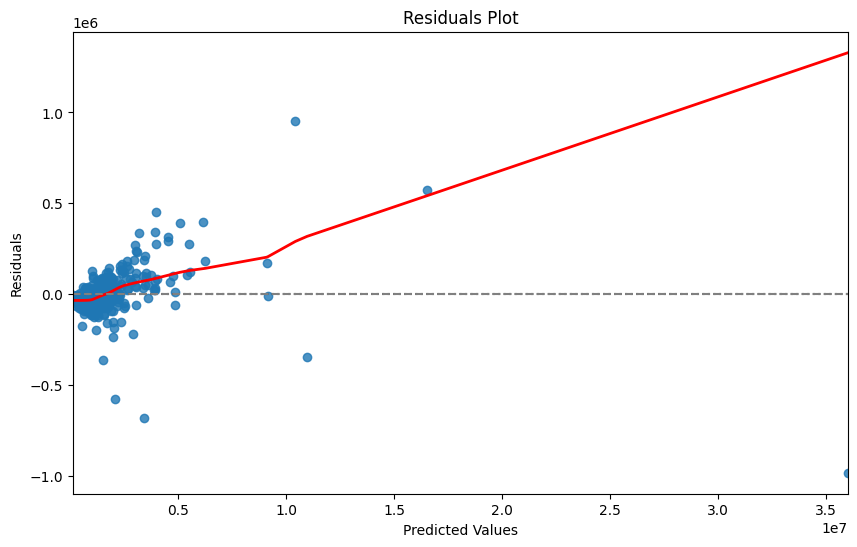

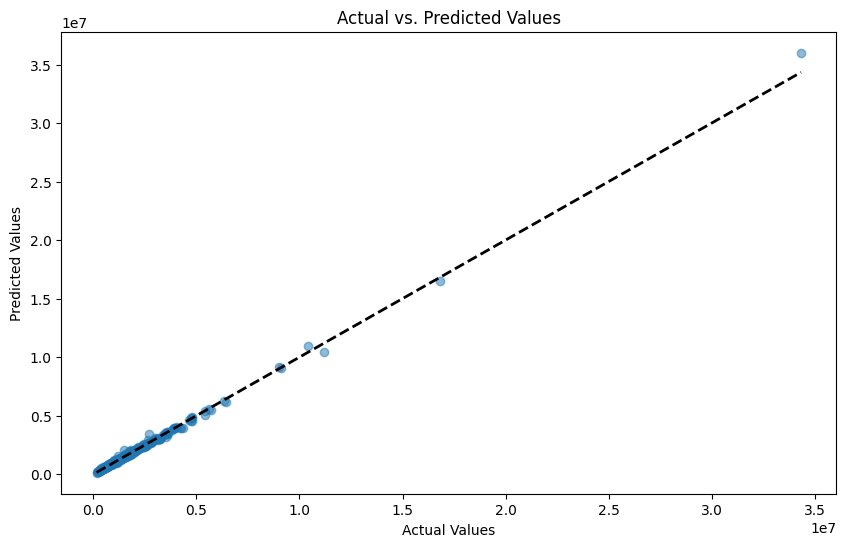

In [ ]:
#visualizing the result
y_pred = best_reg.predict(X_test)
plot_res_reg(y_test,y_pred)

In [ ]:
# Get coefficients
coefficients = best_reg.coef_

# Create a dataframe for easier interpretation
features_importance = pd.DataFrame(coefficients, index=X.columns, columns=['Coefficient'])

# Calculate the absolute values of the coefficients for ranking
features_importance['Absolute'] = features_importance['Coefficient'].abs()

# Sort the features based on absolute value of coefficients
features_importance = features_importance.sort_values(by='Absolute', ascending=False)

print(features_importance)

                               Coefficient      Absolute
house_type_Home              -63996.645269  63996.645269
house_type_House              50526.453442  50526.453442
house_type_Multi-family home  30179.023527  30179.023527
bathrooms                     23761.137071  23761.137071
latitude                     -15947.572173  15947.572173
longitude                     11981.288419  11981.288419
house_type_Townhouse          -9130.680560   9130.680560
bedrooms                       8476.666580   8476.666580
house_type_Condo              -7578.151141   7578.151141
violent_crimes                 -397.842152    397.842152
morgage_fee                     265.320765    265.320765
property_crimes                 202.380747    202.380747
hoa_fee                           9.844690      9.844690
area_sqft                         6.668449      6.668449
rent_zestimate                    6.142794      6.142794


violent_crimes and property_crimes have negative coefficients, even though they are much smaller in magnitude compared to other features. This suggests a slight decrease in property value with an increase in crime rates.

The residuals plot displays a pattern where the residuals increase with the predicted values.

Actual vs. Predicted Values Plot:

Most predicted values are closely aligned with the actual values for lower and mid-range properties, as shown by the points following closely to the dashed diagonal line.

Similar to the residuals plot, the model seems to underestimate the value of the highest-priced homes. This is shown by the actual values deviating above the dashed line in the upper region of the plot.

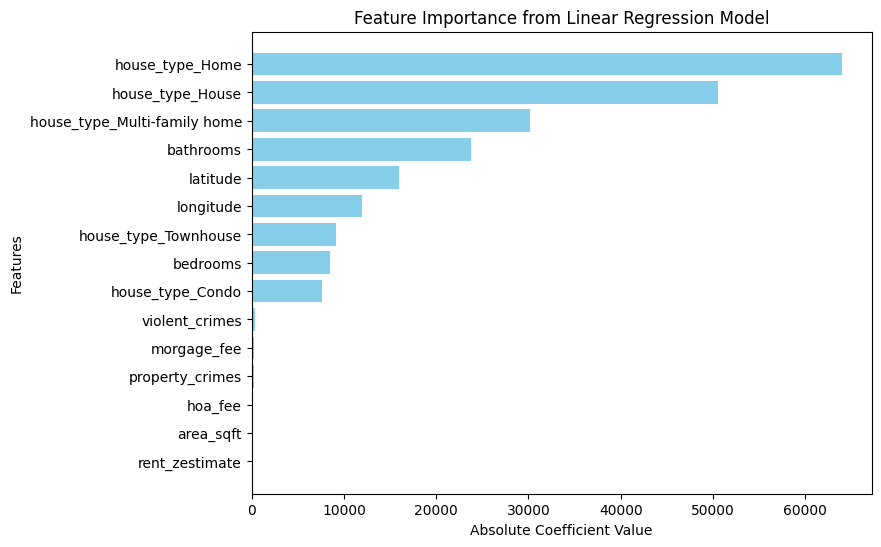

In [ ]:
import matplotlib.pyplot as plt

# Assuming features_importance is the DataFrame with coefficients and their absolute values

# Sort features based on importance
features_importance_sorted = features_importance.sort_values(by='Absolute', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(features_importance_sorted.index, features_importance_sorted['Absolute'], color='skyblue')
ax.set_xlabel('Absolute Coefficient Value')
ax.set_ylabel('Features')
ax.set_title('Feature Importance from Linear Regression Model')

plt.show()

**Feature Importance (Linear Regression Model):**

The bar chart of feature importance from the Linear Regression Model shows that house type and location (latitude and longitude) are among the most influential factors affecting property value predictions.
Interestingly, violent crimes and property crimes, which are the latent variables added to the dataset, show relatively low importance according to the linear regression model. This might imply that the impact of crime rates on property values is not as significant as other variables or is possibly being captured by other variables in the dataset.

## Making A Regression Model to forecast price for 2029 with Latent Variables

In [ ]:
X, y = data_2029_latent.drop('zestimate', axis=1), data_2029_latent['zestimate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=9)

best_reg, result = run_muller_loop('Year_2029_latent', X_train, y_train, X_test, y_test)

11/11 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 2728332742821.627930
Mean Absolute Error (MAE): 815478.894902
R-squared (R2): 0.764214
For MLP Regressor MSE 2728332742821.628, Training Time = 1.163810
Mean Squared Error (MSE): 39200800516.613327
Mean Absolute Error (MAE): 94591.009187
R-squared (R2): 0.996612
For Linear Regression MSE 39200800516.61333, Training Time = 0.331561
Mean Squared Error (MSE): 42393660563.008224
Mean Absolute Error (MAE): 81867.729166
R-squared (R2): 0.996336
For Random Forest Regressor MSE 42393660563.008224, Training Time = 0.636574
Mean Squared Error (MSE): 443790527047.176025
Mean Absolute Error (MAE): 150007.528915
R-squared (R2): 0.961647
For KNN Regressor MSE 443790527047.176, Training Time = 0.310871
Mean Squared Error (MSE): 3063071269841.163086
Mean Absolute Error (MAE): 779639.626441
R-squared (R2): 0.735286
For XGBoost Regressor MSE 3063071269841.163, Training Time = 0.293420
Mean Squared Error (MSE): 32455563958.578

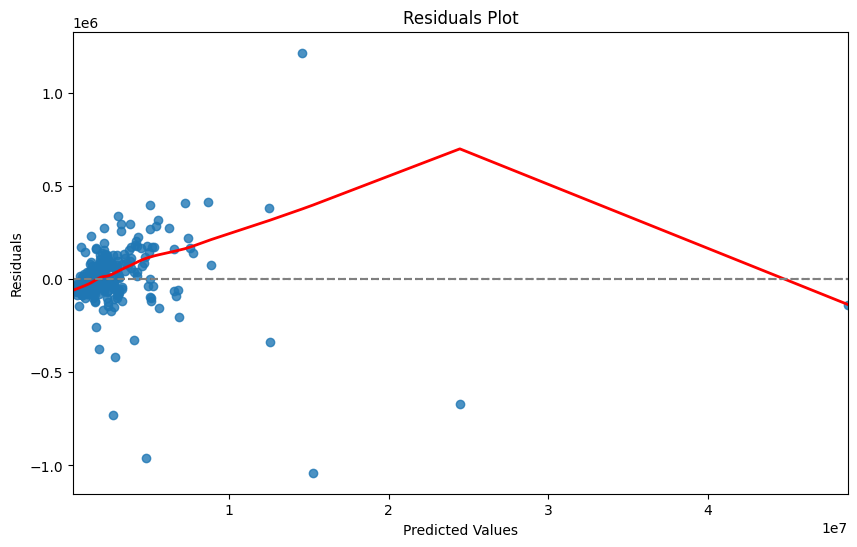

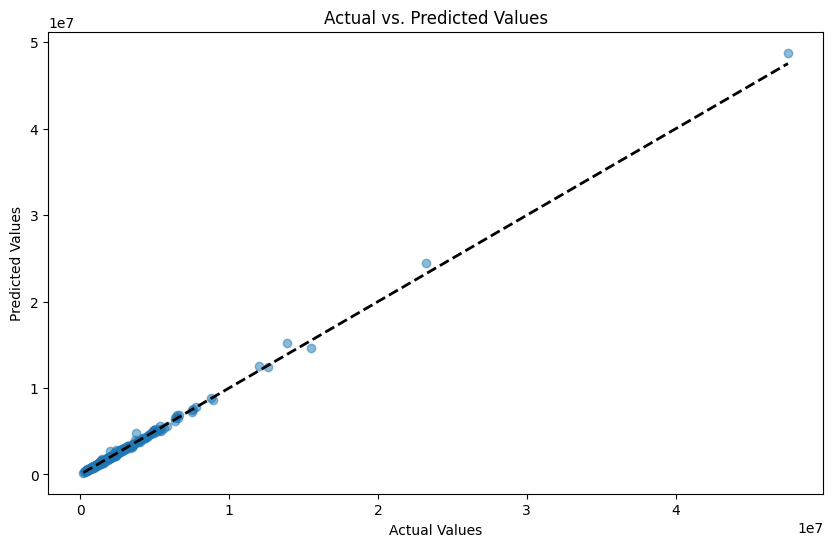

In [ ]:
#visualizing the result
y_pred = best_reg.predict(X_test)
plot_res_reg(y_test,y_pred)

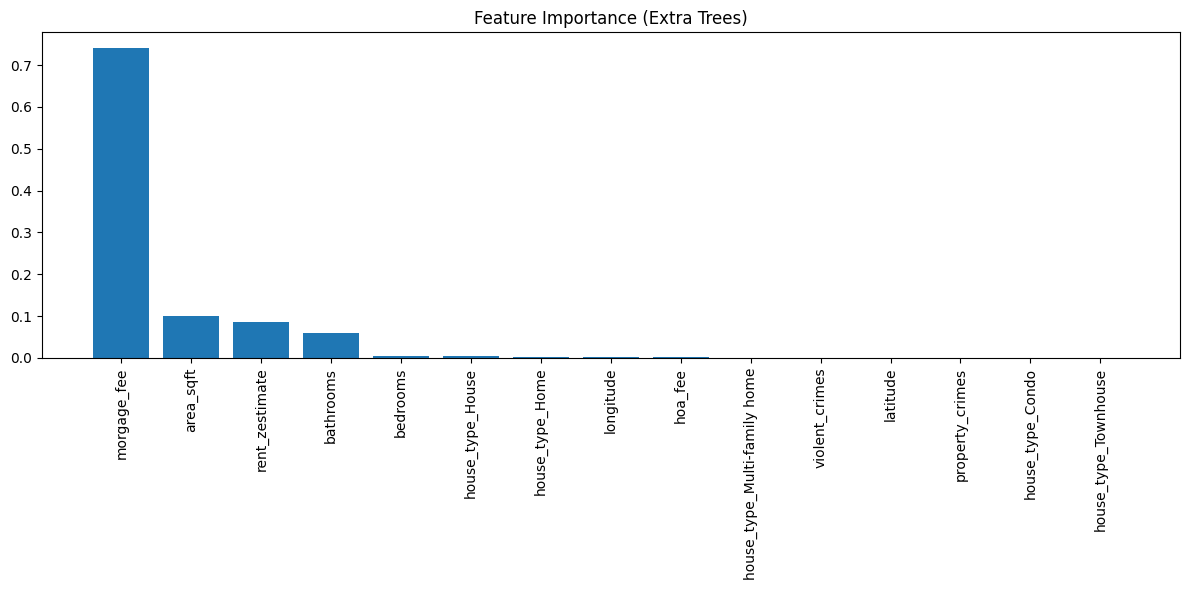

In [ ]:
feature_importances_et = best_reg.feature_importances_
# Sort the feature importance in descending order
sorted_indices_et = np.argsort(feature_importances_et)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importance (Extra Trees)')
plt.bar(range(X.shape[1]), feature_importances_et[sorted_indices_et], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices_et], rotation=90)
plt.tight_layout()
plt.show()

The residuals plot displays a noticeable trend, which suggests that the model’s predictions are systematically off for certain values.


The actual vs. predicted plot shows a close alignment along the dashed line, which represents perfect predictions, especially for properties with lower zestimate values.

**Feature Importance (Extra Trees Model):**

The Extra Trees model gives the most importance to the mortgage fee, followed by area square footage and rent estimate, which differs from the linear regression model's assessment. This variation highlights that different models can capture the importance of features in different ways.

# **Conclusion**

Adding latent variables to the model has changed the dynamics of prediction, although these new variables do not seem to be the strongest predictors compared to traditional real estate features.


The implication of this on our objective of using these predictions for classifying if a property is woth investing or no is that. As the MSE and MAE are too high, and even though logic for projecting the value is simple, we wont use these prediction for our classification task.

#Final Tabular Result:

# New Section

In [ ]:
import pandas as pd
import os
import numpy as np
import pickle
import json

path = '/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/midsem/models/regression_results'

dictionaries  = []
for i in os.listdir(path):
  #get the name of the muller loop iteration
  with open(os.path.join(path,i),'rb') as f:
    dictionaries.append(pickle.load(f))

json_data = json.dumps(dictionaries)
# Convert JSON data to a Python object
data = json.loads(json_data)

# Create a list to hold the hierarchical data
hierarchical_data = []

# Iterate through the top-level array
for scenario in data:
    for scenario_name, models in scenario.items():
        # Iterate through the models array
        for model in models:
            for model_name, metrics in model.items():
                # Add a row for each model with the scenario, model, and metrics
                hierarchical_data.append((scenario_name, model_name, metrics['MSE'], metrics['MAE'], metrics['R2']))

# Convert the list to a DataFrame
columns = ['Scenario', 'Model', 'MSE', 'MAE', 'R2']
df = pd.DataFrame(hierarchical_data, columns=columns)

# Set the index to be hierarchical (Scenario, Model)
df.set_index(['Scenario', 'Model'], inplace=True)
df_html = df.to_html()
# Save the HTML to a file
with open('df.html', 'w') as file:
    file.write(df_html)

In [ ]:
df

MSE  \
Scenario         Model                                                 
Year_2025        MLP Regressor                          2.754404e+12   
                 Linear Regression                      3.167963e+10   
                 Random Forest Regressor                2.969594e+11   
                 KNN Regressor                          1.069318e+12   
                 XGBoost Regressor                      4.755500e+12   
                 Extra Trees Regressor                  2.105757e+11   
                 Stochastic Gradient Descent Regressor  1.022374e+35   
Year_2026        MLP Regressor                          2.149566e+12   
                 Linear Regression                      3.328948e+10   
                 Random Forest Regressor                3.307092e+11   
                 KNN Regressor                          1.078473e+12   
                 XGBoost Regressor                      5.023788e+12   
                 Extra Trees Regressor                  2.684852e+11   
                 Stochastic Gradient Descent Regressor  2.678540e+36   
Year_2029        MLP Regressor                          4.820160e+12   
                 Linear Regression                      5.970942e+10   
                 Random Forest Regressor                5.862433e+11   
                 KNN Regressor                          2.155020e+12   
                 XGBoost Regressor                      9.564620e+12   
                 Extra Trees Regressor                  5.369659e+11   
                 Stochastic Gradient Descent Regressor  2.391924e+34   
Year_2025_Latent MLP Regressor                          2.083190e+12   
                 Linear Regression                      2.065098e+10   
                 Random Forest Regressor                1.656940e+10   
                 KNN Regressor                          2.102221e+11   
                 XGBoost Regressor                      1.536074e+12   
                 Extra Trees Regressor                  1.935125e+10   
                 Stochastic Gradient Descent Regressor  4.649215e+33   
Year_2026_latent MLP Regressor                          1.424556e+12   
                 Linear Regression                      2.127733e+10   
                 Random Forest Regressor                2.233548e+10   
                 KNN Regressor                          2.158047e+11   
                 XGBoost Regressor                      1.592422e+12   
                 Extra Trees Regressor                  2.390304e+10   
                 Stochastic Gradient Descent Regressor  1.527324e+34   
Year_2029_latent MLP Regressor                          2.728333e+12   
                 Linear Regression                      3.920080e+10   
                 Random Forest Regressor                4.239366e+10   
                 KNN Regressor                          4.437905e+11   
                 XGBoost Regressor                      3.063071e+12   
                 Extra Trees Regressor                  3.245556e+10   
                 Stochastic Gradient Descent Regressor  9.857088e+35   

                                                                 MAE  \
Scenario         Model                                                 
Year_2025        MLP Regressor                          7.984564e+05   
                 Linear Regression                      8.659151e+04   
                 Random Forest Regressor                1.015002e+05   
                 KNN Regressor                          1.868270e+05   
                 XGBoost Regressor                      8.263144e+05   
                 Extra Trees Regressor                  9.763955e+04   
                 Stochastic Gradient Descent Regressor  8.414430e+16   
Year_2026        MLP Regressor                          6.738507e+05   
                 Linear Regression                      8.726197e+04   
                 Random Forest Regressor                9.985124e+04   
                 KNN Regressor  

# Classification
To classify which properties are worth investment

We Will use the data labelled by fractal clustering to perform the task at hand


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

real_estate_data = pd.read_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/midsem/labeled_cleaned_zillow_dataset.csv')
real_estate_data.head()

,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,status_text,first_line,city,state,zip,area_sqft,house_type,morgage_fee,hoa_fee,label
0,101,59725885,"47 Golden Eagle, Irvine, CA 92603",33.622334,-117.798770,15788000,9.0,6.0,14754000.0,36634.0,House for sale,47 Golden Eagle,Irvine,CA,92603,10863,House,53261.133102,397.157121,Least Desirable
1,99,61499355,"17 Prairie Grass, Irvine, CA 92603",33.637825,-117.791840,8500000,5.0,4.0,7887800.0,25557.0,House for sale,17 Prairie Grass,Irvine,CA,92603,4355,House,28674.919646,0.000000,Least Desirable
2,448,16834435,"9581 La Jolla Farms Rd, La Jolla, CA 92037",32.880512,-117.246770,10300000,6.0,4.0,9380300.0,32808.0,House for sale,9581 La Jolla Farms Rd,La Jolla,CA,92037,6734,House,34747.255571,391.130567,Least Desirable
3,94,16856415,"5740 La Jolla Corona Dr, La Jolla, CA 92037",32.816860,-117.265540,16999999,8.0,5.0,15362800.0,54026.0,House for sale,5740 La Jolla Corona Dr,La Jolla,CA,92037,8810,House,57349.835918,0.000000,Least Desirable
4,298,99474365,"8022 Entrada De Luz E, San Diego, CA 92127",32.989952,-117.141075,8950000,7.0,5.0,8861900.0,23976.0,House for sale,8022 Entrada De Luz E,San Diego,CA,92127,7233,House,30193.003627,0.000000,Least Desirable


In [ ]:
real_estate_data.shape

(1632, 20)

In [ ]:
# Columns to be dropped
columns_to_drop = ['rank','property_id', 'address', 'status_text','first_line', 'city', 'state']

# Drop the specified columns
real_estate_data = real_estate_data.drop(columns=columns_to_drop)

# Verify the columns have been dropped
print(real_estate_data.head())


    latitude   longitude     price  bathrooms  bedrooms   zestimate  \
0  33.622334 -117.798770  15788000        9.0       6.0  14754000.0   
1  33.637825 -117.791840   8500000        5.0       4.0   7887800.0   
2  32.880512 -117.246770  10300000        6.0       4.0   9380300.0   
3  32.816860 -117.265540  16999999        8.0       5.0  15362800.0   
4  32.989952 -117.141075   8950000        7.0       5.0   8861900.0   

   rent_zestimate    zip  area_sqft house_type   morgage_fee     hoa_fee  \
0         36634.0  92603      10863      House  53261.133102  397.157121   
1         25557.0  92603       4355      House  28674.919646    0.000000   
2         32808.0  92037       6734      House  34747.255571  391.130567   
3         54026.0  92037       8810      House  57349.835918    0.000000   
4         23976.0  92127       7233      House  30193.003627    0.000000   

             label  
0  Least Desirable  
1  Least Desirable  
2  Least Desirable  
3  Least Desirable  
4  Least De

In [ ]:
#one hot encoding the house type
import pandas as pd
real_estate_data = pd.get_dummies(real_estate_data, columns=['house_type'])
print(real_estate_data.head())

    latitude   longitude     price  bathrooms  bedrooms   zestimate  \
0  33.622334 -117.798770  15788000        9.0       6.0  14754000.0   
1  33.637825 -117.791840   8500000        5.0       4.0   7887800.0   
2  32.880512 -117.246770  10300000        6.0       4.0   9380300.0   
3  32.816860 -117.265540  16999999        8.0       5.0  15362800.0   
4  32.989952 -117.141075   8950000        7.0       5.0   8861900.0   

   rent_zestimate    zip  area_sqft   morgage_fee     hoa_fee  \
0         36634.0  92603      10863  53261.133102  397.157121   
1         25557.0  92603       4355  28674.919646    0.000000   
2         32808.0  92037       6734  34747.255571  391.130567   
3         54026.0  92037       8810  57349.835918    0.000000   
4         23976.0  92127       7233  30193.003627    0.000000   

             label  house_type_Condo  house_type_Home  house_type_House  \
0  Least Desirable             False            False              True   
1  Least Desirable             F

In [ ]:
#performing a label encoding on the input data
from sklearn.preprocessing import LabelEncoder
# Instantiate the LabelEncoder
encoder = LabelEncoder()
# Fit and transform the labels
real_estate_data['label'] = encoder.fit_transform(real_estate_data['label'])

In [ ]:
encoder.classes_

array(['Least Desirable', 'More Desirable', 'Most Desirable'],
      dtype=object)

In [ ]:
real_estate_data['label'].value_counts()

label
1    785
0    769
2     78
Name: count, dtype: int64

### Note:
We are aware that there is a class imbalance , however as the imabalance  for the best possible investment property the risk of miss classifng some thing else as the best property becomes too high, so to over come we are first processing without imbalance and if during the experiemntation we feel that the performance is too low we would explore Upsmalping techniques.


### Model evlauation Criteria

We will be using the f1-scoreand precision for class 2, as our primary metric for evaluation along with confusion matrix. The reason for picking up these metrics is that we want to be sure that pick a model which doesn't have a large false positive when it comes to class 2 prediction.


Miss classifyin class 0 and 1 is much more forgiveable , when we decide on what to act in terms of buying the property.

### Muller's loop

In [ ]:
''''
This cell contains various functions which will be used for trainging and visualization purpose
'''

from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import pickle
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import shap

def get_metrics(y_true, y_pred):
  #we will be calculating the metrics wrt to class 2
  class_label=2
  metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, labels=[class_label], average='macro'),
        'recall': recall_score(y_true, y_pred, labels=[class_label], average='macro'),
        'f1_score': f1_score(y_true, y_pred, labels=[class_label], average='macro')
    }

  return metrics

def result_table(results_dict,iter_name):
    # Extract the data into a list of tuples
    data = []
    for classifier_dict in results_dict[iter_name]:
        for classifier, metrics in classifier_dict.items():
            data.append((classifier, metrics['F1_Score'], metrics['Recall'], metrics['Precision'], metrics['Accuracy']))

    # Convert the list of tuples into a DataFrame
    df = pd.DataFrame(data, columns=['Classifier', 'F1_Score', 'Recall', 'Precision', 'Accuracy'])

    # return the DataFrame
    return df

def evluation(classifier,X_test,y_test,y_pred,n_classes=3):
    # Confusion Matrix for the seond class
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Compute ROC curve and ROC area for each class
    y_score = classifier.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Convert y_test to one-hot encoding for multi-class ROC curve
    y_test_one_hot = np.eye(n_classes)[y_test]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for multi-class')
    plt.legend(loc="lower right")
    plt.show()

def evaluate_classifiers(iter_name,X_data, y_data, test_size=0.2, classifiers=None,retrain = False):
    if classifiers is None:
        classifiers = [
            KNeighborsClassifier(3),
            SVC(kernel="linear", C=0.025),
            #SVC(gamma=2, C=1),
            DecisionTreeClassifier(max_depth=5),
            RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
            #MLPClassifier(alpha=1, max_iter=1000),
            AdaBoostClassifier(),
            #GaussianNB(),
            #QuadraticDiscriminantAnalysis()
            ]

    names = [clf.__class__.__name__ for clf in classifiers]

    # Scale the features
    X = StandardScaler().fit_transform(X_data)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=test_size,random_state=3)

    max_score = 0.0
    max_class = ''
    clf_best = None
    base_path = '/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/midsem/models/classification'
    result = {iter_name:[]}
    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
      file_name = f'{iter_name}{name}.pkl'
      path=os.path.join(base_path,file_name)
      start_time = time()
      if not os.path.exists(path) or retrain == True:
        #we will only retrain if the path to the model doesn't exists or if the retrain flag is set as true
        clf.fit(X_train, y_train)
        #saving the model as pickle
        with open(path,'wb') as f:
          pickle.dump(clf,f)
      else:
        # Load the model from the file
        with open(path, 'rb') as f:
          clf = pickle.load(f)

      y_pred = clf.predict(X_test)
      metrics = get_metrics(y_test,y_pred)
      acc,f1,recall,precision = metrics['accuracy'],metrics['f1_score'],metrics['recall'],metrics['precision']
      score = f1
      print(f'Classifier = {name}, Score (test, f1_score) = {score:.2f}, Training time = {time() - start_time:.2f} seconds')
      #saving the result
      result[iter_name].append({name:{'F1_Score':f1,'Recall':recall,'Precision':precision,'Accuracy':acc}})
      if score > max_score:
          clf_best = clf
          max_score = score
          max_class = name

    print(80 * '-' )
    print(f'Best --> Classifier = {max_class}, Score (test, f1_score) = {max_score:.2f}')
    df = result_table(result,iter_name)
    evluation(clf_best,X_test,y_test,y_pred,n_classes=3)
    return clf_best, max_score, max_class,df


def generate_and_plot_shap(best_classifier,name, df):
  explainer = shap.Explainer(best_classifier)
  # Assuming `real_estate_data` is your DataFrame and it has been preprocessed
  X = df.drop("label", axis=1)
  y = df["label"]
  shap_values = explainer.shap_values(X)
  # Plot SHAP summary plot for each class with customization
  for i in range(shap_values.shape[2]):
      class_shap_values = shap_values[:, :, i]
      plt.figure(figsize=(10, 8))  # Set the plot size
      print(f"Class {encoder.classes_[i]} - SHAP Summary for {name}")
      shap.summary_plot(class_shap_values, X.values, feature_names=X.columns,
                        plot_type='bar', color='royalblue',
                        max_display=5)  # Customize the plot
      plt.tight_layout()


  # Calculate the mean absolute SHAP value for each feature across all instances and classes
  mean_abs_shap_values = np.abs(shap_values).mean(axis=(0, 2))

  # Get the feature names sorted by their mean absolute SHAP value in descending order
  sorted_feature_names = np.array(X.columns)[np.argsort(-mean_abs_shap_values)]

  # Select the top 5 most important features
  top_5_features = sorted_feature_names[:5]

  print("Top 5 most important features based on SHAP values:")
  print(top_5_features)



### Experimenting with Base Data

Using just the base data without any latent variables for building the model

Classifier = KNeighborsClassifier, Score (test, f1_score) = 0.48, Training time = 0.56 seconds
Classifier = SVC, Score (test, f1_score) = 0.72, Training time = 0.27 seconds
Classifier = DecisionTreeClassifier, Score (test, f1_score) = 0.84, Training time = 0.28 seconds
Classifier = RandomForestClassifier, Score (test, f1_score) = 0.00, Training time = 0.27 seconds
Classifier = AdaBoostClassifier, Score (test, f1_score) = 0.41, Training time = 0.33 seconds
--------------------------------------------------------------------------------
Best --> Classifier = DecisionTreeClassifier, Score (test, f1_score) = 0.84


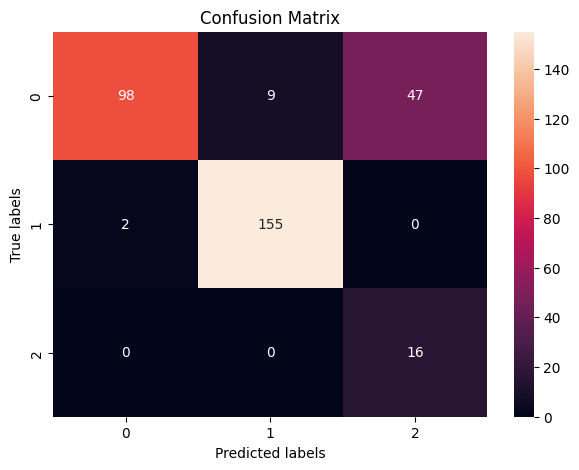

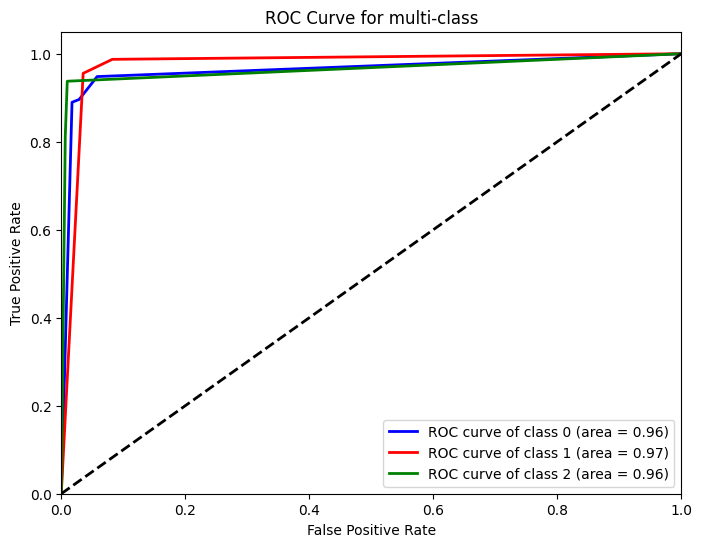

,Classifier,F1_Score,Recall,Precision,Accuracy
0,KNeighborsClassifier,0.476190,0.3125,1.000000,0.886850
1,SVC,0.720000,0.5625,1.000000,0.883792
2,DecisionTreeClassifier,0.838710,0.8125,0.866667,0.944954
3,RandomForestClassifier,0.000000,0.0000,0.000000,0.911315
4,AdaBoostClassifier,0.405063,1.0000,0.253968,0.822630


In [ ]:
# Example usage:
# Assuming `real_estate_data` is your DataFrame and it has been preprocessed
X = real_estate_data.drop("label", axis=1)
y = real_estate_data["label"]

# Call the function
best_classifier, best_score, best_classifier_name, results_base = evaluate_classifiers('BaseClassification',X,y)
results_base

After training on the base data we found that the best model for our use case is a DecisionTree, which has an F1 score of 83.8% and precision of 86.67% however from he decision matrix we can see that  hgh number of class 0 elemets are being cassifed as class 2. This is the behaviour we are trying to avoid.

So let usee see if by using any latent variables and additional data if we can make the performance slighlty better.

Class Least Desirable - SHAP Summary for DecisionTreeClassifier


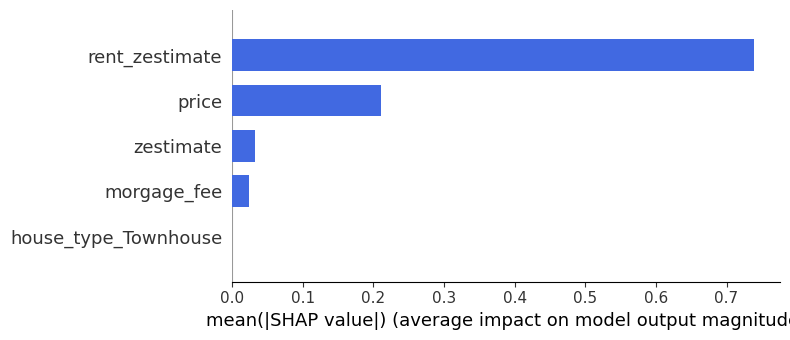

Class More Desirable - SHAP Summary for DecisionTreeClassifier


<Figure size 640x480 with 0 Axes>

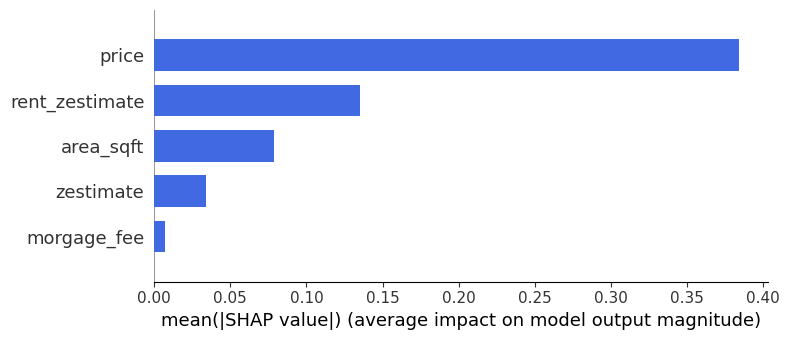

Class Most Desirable - SHAP Summary for DecisionTreeClassifier


<Figure size 640x480 with 0 Axes>

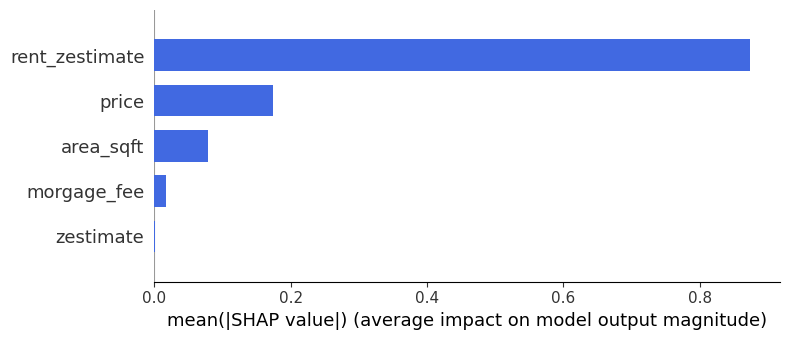

Top 5 most important features based on SHAP values:
['rent_zestimate' 'price' 'area_sqft' 'zestimate' 'morgage_fee']


<Figure size 640x480 with 0 Axes>

In [ ]:
#Visualizing the feature importance for each class
generate_and_plot_shap(best_classifier,best_classifier_name,real_estate_data)

Our 5 most promising feature as per SHAP values are ['rent_zestimate' 'price' 'area_sqft' 'zestimate' 'morgage_fee']

### Experimenting with 1st latent variable and amalgmation

One of the factors which would affect a house purchasing decision would be the crime rate in the neighbourhood of house. To capture this we join our data with crime rates data found in a dataset resent on  https://www.ppic.org/data-set/crime-rates-in-california/
 i.e property crimes

 We use the county and zip mapping to join the 2 data sets.

 From the crimes dataset would  be forst looking at the total property per zip crimes feature this includes crimes such as breakins, burgluary etc.

Note: During the mid sem as work was going on in parellel, on person was woorking on cleaning the data and other person was working on finding the latet variables and joining it together. Cause of this behaviour we had joined the latent variables with our uncleaned data first. And Now we are using property id from that joined file and our cleaned data file to make the file.

The orignal joining code can be found here: https://colab.research.google.com/drive/1KHLWvgn1cY3IX3RvsY9rJ_gK9ANlesUw?usp=sharing

In [ ]:
zip_to_county = pd.read_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/midsem/ca_zip_and_county 4.29.41 PM.csv')

In [ ]:
real_estate_data = pd.read_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/midsem/labeled_cleaned_zillow_dataset.csv')

In [ ]:
# Columns to be dropped
columns_to_drop = ['rank','address', 'status_text','first_line', 'city', 'state']
# Drop the specified columns
real_estate_data = real_estate_data.drop(columns=columns_to_drop)

In [ ]:
print(real_estate_data.head())

   property_id   latitude   longitude     price  bathrooms  bedrooms  \
0     59725885  33.622334 -117.798770  15788000        9.0       6.0   
1     61499355  33.637825 -117.791840   8500000        5.0       4.0   
2     16834435  32.880512 -117.246770  10300000        6.0       4.0   
3     16856415  32.816860 -117.265540  16999999        8.0       5.0   
4     99474365  32.989952 -117.141075   8950000        7.0       5.0   

    zestimate  rent_zestimate    zip  area_sqft house_type   morgage_fee  \
0  14754000.0         36634.0  92603      10863      House  53261.133102   
1   7887800.0         25557.0  92603       4355      House  28674.919646   
2   9380300.0         32808.0  92037       6734      House  34747.255571   
3  15362800.0         54026.0  92037       8810      House  57349.835918   
4   8861900.0         23976.0  92127       7233      House  30193.003627   

      hoa_fee            label  
0  397.157121  Least Desirable  
1    0.000000  Least Desirable  
2  391.1305

In [ ]:
data2 = pd.read_csv("/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/midsem/final_real_estate_data.csv") # we have already performed the required joinand asvedthe joined data in this file (reason for this is multiple work was beign done is parellel)

In [ ]:
data = pd.merge(real_estate_data, data2[['property_id', 'property_crimes']], on='property_id', how='left') # joining the crimse ou dataset based on, property_id

In [ ]:
data = data.drop('property_id', axis=1)

In [ ]:
data.head()

,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,zip,area_sqft,house_type,morgage_fee,hoa_fee,label,property_crimes
0,33.622334,-117.798770,15788000,9.0,6.0,14754000.0,36634.0,92603,10863,House,53261.133102,397.157121,Least Desirable,1853.624835
1,33.637825,-117.791840,8500000,5.0,4.0,7887800.0,25557.0,92603,4355,House,28674.919646,0.000000,Least Desirable,1853.624835
2,32.880512,-117.246770,10300000,6.0,4.0,9380300.0,32808.0,92037,6734,House,34747.255571,391.130567,Least Desirable,1653.528173
3,32.816860,-117.265540,16999999,8.0,5.0,15362800.0,54026.0,92037,8810,House,57349.835918,0.000000,Least Desirable,1653.528173
4,32.989952,-117.141075,8950000,7.0,5.0,8861900.0,23976.0,92127,7233,House,30193.003627,0.000000,Least Desirable,1653.528173


In [ ]:
data = pd.get_dummies(data, columns=['house_type'])
print(data.head())

    latitude   longitude     price  bathrooms  bedrooms   zestimate  \
0  33.622334 -117.798770  15788000        9.0       6.0  14754000.0   
1  33.637825 -117.791840   8500000        5.0       4.0   7887800.0   
2  32.880512 -117.246770  10300000        6.0       4.0   9380300.0   
3  32.816860 -117.265540  16999999        8.0       5.0  15362800.0   
4  32.989952 -117.141075   8950000        7.0       5.0   8861900.0   

   rent_zestimate    zip  area_sqft   morgage_fee     hoa_fee  \
0         36634.0  92603      10863  53261.133102  397.157121   
1         25557.0  92603       4355  28674.919646    0.000000   
2         32808.0  92037       6734  34747.255571  391.130567   
3         54026.0  92037       8810  57349.835918    0.000000   
4         23976.0  92127       7233  30193.003627    0.000000   

             label  property_crimes  house_type_Condo  house_type_Home  \
0  Least Desirable      1853.624835             False            False   
1  Least Desirable      1853.62483

In [ ]:
encoder = LabelEncoder()
# Fit and transform the labels
data['label'] = encoder.fit_transform(data['label'])
encoder.classes_
data['label'].value_counts()

label
1    787
0    769
2     78
Name: count, dtype: int64

Classifier = KNeighborsClassifier, Score (test, f1_score) = 0.40, Training time = 0.39 seconds
Classifier = SVC, Score (test, f1_score) = 0.48, Training time = 0.40 seconds
Classifier = DecisionTreeClassifier, Score (test, f1_score) = 0.94, Training time = 0.26 seconds
Classifier = RandomForestClassifier, Score (test, f1_score) = 0.00, Training time = 0.35 seconds
Classifier = AdaBoostClassifier, Score (test, f1_score) = 0.40, Training time = 1.01 seconds
--------------------------------------------------------------------------------
Best --> Classifier = DecisionTreeClassifier, Score (test, f1_score) = 0.94


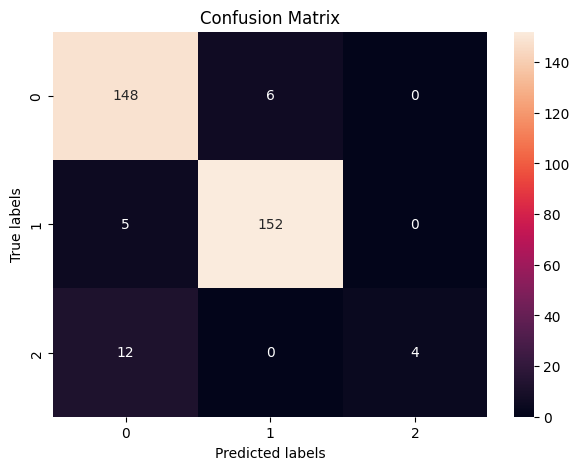

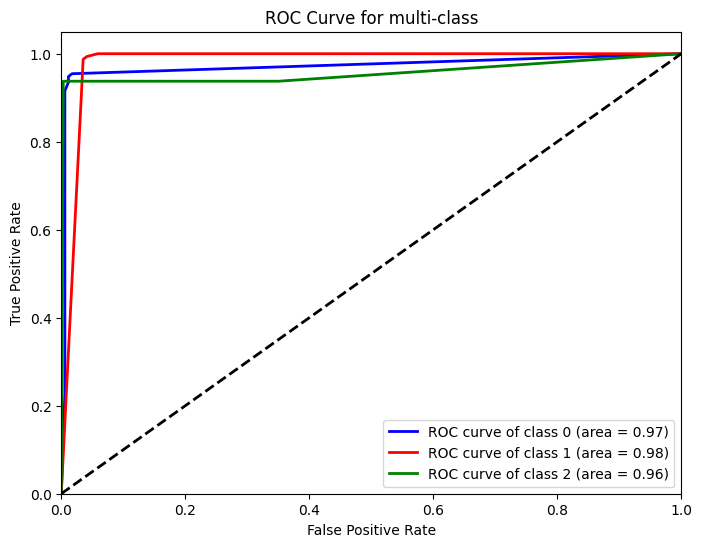

,Classifier,F1_Score,Recall,Precision,Accuracy
0,KNeighborsClassifier,0.40000,0.2500,1.0000,0.886850
1,SVC,0.47619,0.3125,1.0000,0.889908
2,DecisionTreeClassifier,0.93750,0.9375,0.9375,0.969419
3,RandomForestClassifier,0.00000,0.0000,0.0000,0.920489
4,AdaBoostClassifier,0.40000,0.2500,1.0000,0.929664


In [ ]:
#running the muller's loop of first latent variableand
X = data.drop("label", axis=1)
y = data["label"]
# Call the function
best_classifier, best_score, best_classifier_name, results_amal1 = evaluate_classifiers('ClassificationWithPropertyCrimes',X,y,retrain=True)
results_amal1


After running the muller's loop on the the first amalgation where include the number of property crimes in the are of the house, the best performing model was once againa DecisionTree model with a preciion of 100% and F1 score of 96.7. When you look at the confusion matrix you can see we greatly reduce the false positives for class 2. This is the behviour which we re looking for. However one small problem with this model is that I missclassifes a chunck of class 2 properties as class 0 . This is better thasn misclassifying class 0 as class 2. One of the possible reasons is that from he model's shaps values we can see that class 0 and class 2 have the same top 5 important features.

Class Least Desirable - SHAP Summary for DecisionTreeClassifier


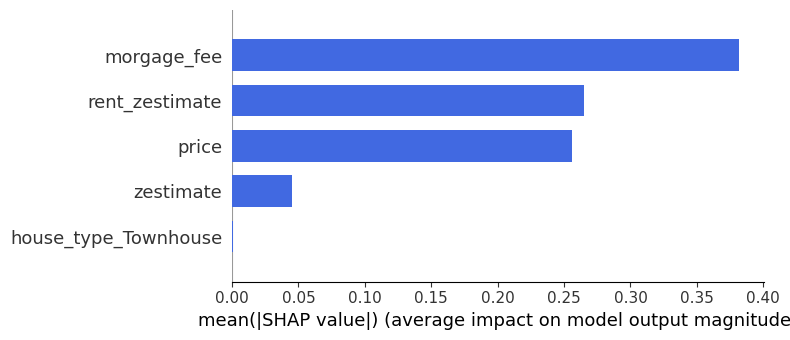

Class More Desirable - SHAP Summary for DecisionTreeClassifier


<Figure size 640x480 with 0 Axes>

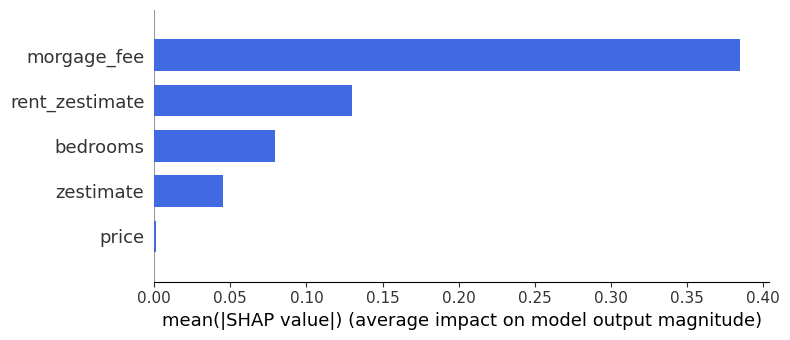

Class Most Desirable - SHAP Summary for DecisionTreeClassifier


<Figure size 640x480 with 0 Axes>

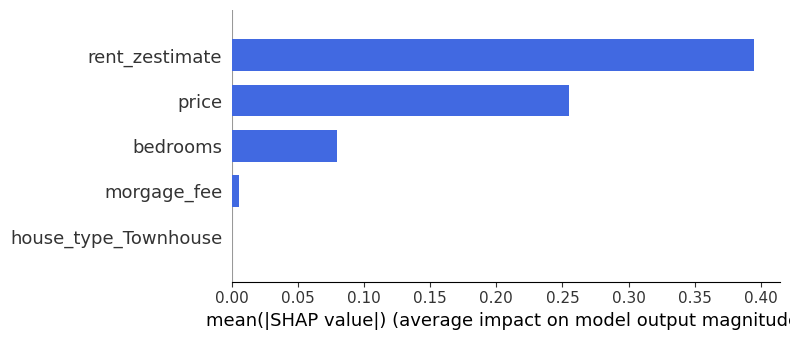

Top 5 most important features based on SHAP values:
['rent_zestimate' 'morgage_fee' 'price' 'bedrooms' 'zestimate']


<Figure size 640x480 with 0 Axes>

In [ ]:
generate_and_plot_shap(best_classifier,best_classifier_name,data)

Let us see if by additing a secondary latent variable changes anything

### With Second latent variable


We use the same logic we used for latenet feature one, however this time instead of looking at property crimes we will be looking at property and violent crimes in an area. We used the viloent crimes data vaialbel on  https://www.ppic.org/data-set/crime-rates-in-california/

Note: During the mid sem as work was going on in parellel, on person was woorking on cleaning the data and other person was working on finding the latet variables and joining it together. Cause of this behaviour we had joined the latent variables with our uncleaned data first. And Now we are using property id from that joined file and our cleaned data file to make the file.

The orignal joining code can be found here: https://colab.research.google.com/drive/1KHLWvgn1cY3IX3RvsY9rJ_gK9ANlesUw?usp=sharing

In [ ]:
zip_to_county = pd.read_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/midsem/ca_zip_and_county 4.29.41 PM.csv')

In [ ]:
real_estate_data = pd.read_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/midsem/labeled_cleaned_zillow_dataset.csv')

In [ ]:
# Columns to be dropped
columns_to_drop = ['rank','address', 'status_text','first_line', 'city', 'state']

# Drop the specified columns
real_estate_data = real_estate_data.drop(columns=columns_to_drop)

In [ ]:
new_data = pd.merge(real_estate_data, data2[['property_id', 'property_crimes', 'violent_crimes']], on='property_id', how='left')

In [ ]:
new_data = new_data.drop('property_id', axis=1)

In [ ]:
new_data.head()

,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,zip,area_sqft,house_type,morgage_fee,hoa_fee,label,property_crimes,violent_crimes
0,33.622334,-117.798770,15788000,9.0,6.0,14754000.0,36634.0,92603,10863,House,53261.133102,397.157121,Least Desirable,1853.624835,212.872774
1,33.637825,-117.791840,8500000,5.0,4.0,7887800.0,25557.0,92603,4355,House,28674.919646,0.000000,Least Desirable,1853.624835,212.872774
2,32.880512,-117.246770,10300000,6.0,4.0,9380300.0,32808.0,92037,6734,House,34747.255571,391.130567,Least Desirable,1653.528173,341.554921
3,32.816860,-117.265540,16999999,8.0,5.0,15362800.0,54026.0,92037,8810,House,57349.835918,0.000000,Least Desirable,1653.528173,341.554921
4,32.989952,-117.141075,8950000,7.0,5.0,8861900.0,23976.0,92127,7233,House,30193.003627,0.000000,Least Desirable,1653.528173,341.554921


In [ ]:
new_data = pd.get_dummies(new_data, columns=['house_type'])
print(new_data.head())
from sklearn.preprocessing import LabelEncoder
# Instantiate the LabelEncoder
encoder = LabelEncoder()
# Fit and transform the labels
new_data['label'] = encoder.fit_transform(new_data['label'])
encoder.classes_
new_data['label'].value_counts()


    latitude   longitude     price  bathrooms  bedrooms   zestimate  \
0  33.622334 -117.798770  15788000        9.0       6.0  14754000.0   
1  33.637825 -117.791840   8500000        5.0       4.0   7887800.0   
2  32.880512 -117.246770  10300000        6.0       4.0   9380300.0   
3  32.816860 -117.265540  16999999        8.0       5.0  15362800.0   
4  32.989952 -117.141075   8950000        7.0       5.0   8861900.0   

   rent_zestimate    zip  area_sqft   morgage_fee     hoa_fee  \
0         36634.0  92603      10863  53261.133102  397.157121   
1         25557.0  92603       4355  28674.919646    0.000000   
2         32808.0  92037       6734  34747.255571  391.130567   
3         54026.0  92037       8810  57349.835918    0.000000   
4         23976.0  92127       7233  30193.003627    0.000000   

             label  property_crimes  violent_crimes  house_type_Condo  \
0  Least Desirable      1853.624835      212.872774             False   
1  Least Desirable      1853.624835 

label
1    787
0    769
2     78
Name: count, dtype: int64

Classifier = KNeighborsClassifier, Score (test, f1_score) = 0.40, Training time = 0.32 seconds
Classifier = SVC, Score (test, f1_score) = 0.48, Training time = 0.33 seconds
Classifier = DecisionTreeClassifier, Score (test, f1_score) = 0.94, Training time = 0.27 seconds
Classifier = RandomForestClassifier, Score (test, f1_score) = 0.00, Training time = 0.31 seconds
Classifier = AdaBoostClassifier, Score (test, f1_score) = 0.40, Training time = 0.26 seconds
--------------------------------------------------------------------------------
Best --> Classifier = DecisionTreeClassifier, Score (test, f1_score) = 0.94


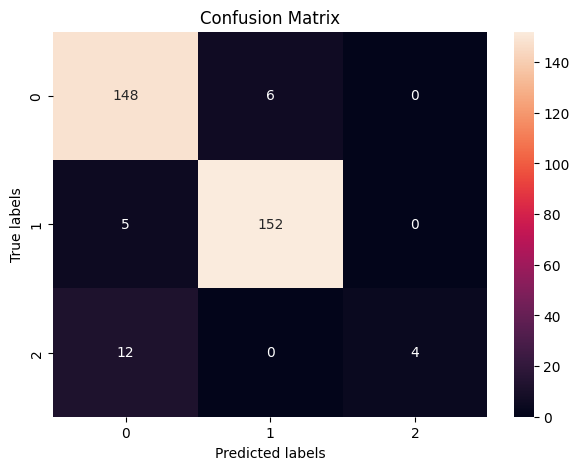

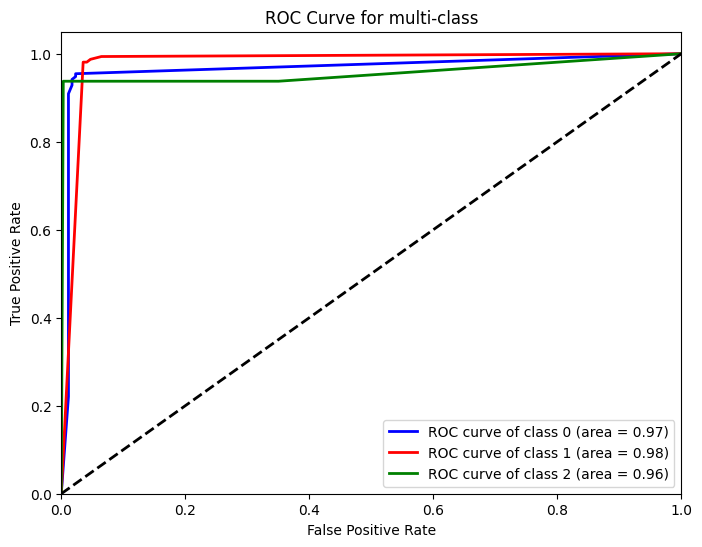

,Classifier,F1_Score,Recall,Precision,Accuracy
0,KNeighborsClassifier,0.40000,0.2500,1.0000,0.886850
1,SVC,0.47619,0.3125,1.0000,0.883792
2,DecisionTreeClassifier,0.93750,0.9375,0.9375,0.963303
3,RandomForestClassifier,0.00000,0.0000,0.0000,0.908257
4,AdaBoostClassifier,0.40000,0.2500,1.0000,0.929664


In [ ]:
#fitting the muller's loop
X = new_data.drop("label", axis=1)
y = new_data["label"]
# Call the function
best_classifier, best_score, best_classifier_name, results_amalg2= evaluate_classifiers('ClassificationLatentVariables1,2',X,y)
results_amalg2

After fitting the model on both the latent variables and malgations we, we find that the best performing model is a Decision tree with precision of 1 and f1 of 97, this is same as when we used the property crime variable, indicating that the violent crime in a property has a lesser impact on buysing decision  compared to property crimes.

Class Least Desirable - SHAP Summary for DecisionTreeClassifier


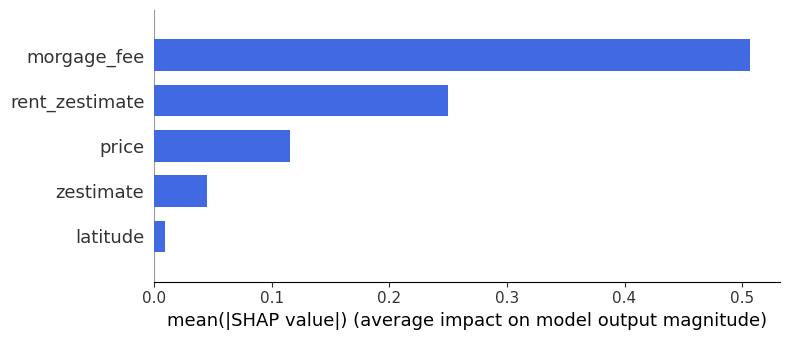

Class More Desirable - SHAP Summary for DecisionTreeClassifier


<Figure size 640x480 with 0 Axes>

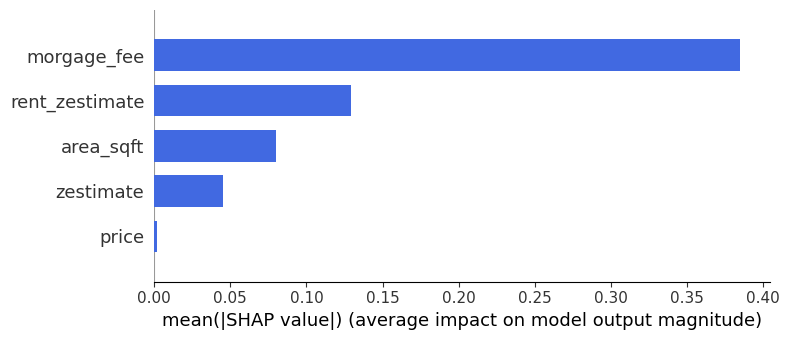

Class Most Desirable - SHAP Summary for DecisionTreeClassifier


<Figure size 640x480 with 0 Axes>

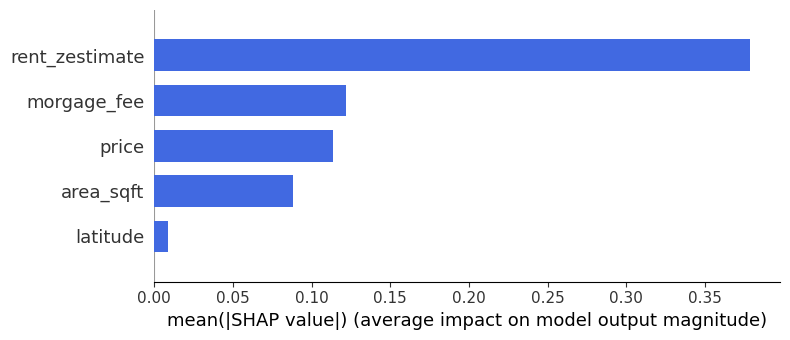

Top 5 most important features based on SHAP values:
['morgage_fee' 'rent_zestimate' 'price' 'area_sqft' 'zestimate']


<Figure size 640x480 with 0 Axes>

In [ ]:
generate_and_plot_shap(best_classifier,best_classifier_name,new_data)

In [ ]:
# Combine the dataframes into a hierarchical dataframe
results = pd.concat([results_base, results_amal1, results_amalg2], keys=['Base', 'Amal1', 'Amalg2'])

In [ ]:
results

Classifier  F1_Score  Recall  Precision  Accuracy
Base   0    KNeighborsClassifier  0.476190  0.3125   1.000000  0.886850
       1                     SVC  0.720000  0.5625   1.000000  0.883792
       2  DecisionTreeClassifier  0.838710  0.8125   0.866667  0.944954
       3  RandomForestClassifier  0.000000  0.0000   0.000000  0.911315
       4      AdaBoostClassifier  0.405063  1.0000   0.253968  0.822630
Amal1  0    KNeighborsClassifier  0.400000  0.2500   1.000000  0.886850
       1                     SVC  0.476190  0.3125   1.000000  0.889908
       2  DecisionTreeClassifier  0.937500  0.9375   0.937500  0.969419
       3  RandomForestClassifier  0.000000  0.0000   0.000000  0.920489
       4      AdaBoostClassifier  0.400000  0.2500   1.000000  0.929664
Amalg2 0    KNeighborsClassifier  0.400000  0.2500   1.000000  0.886850
       1                     SVC  0.476190  0.3125   1.000000  0.883792
       2  DecisionTreeClassifier  0.937500  0.9375   0.937500  0.963303
       3  RandomForestClassifier  0.000000  0.0000   0.000000  0.908257
       4      AdaBoostClassifier  0.400000  0.2500   1.000000  0.929664

## Conclusion

After trying 2 different latent variable with supporting data amalgation, we found that the model that full fills all our requiremen, i.e. high f1 score and precision score with respect to class 2. With almsot 0 false positives for class 2, was build using a DecisionTree classifier which used the base data and just the property crime as a latent variables. Including violent crimes in an area didnot affect our best model in any way, leading us to a conlsuion that viloent crimes would play a lesser role then property crimes when it comes to making the pruchasing decision.

The top 5 feature form our classification are 'price' - current selling price 'rent_zestimate' - current rent estimate ,'area_sqft' 'zestimate' - estimated market value 'morgage_fee' - monthly morageg if decided to buy